# Kaggle UserName: Daisy Le
# StudentID: 47525088

# Introduction


This notebook serves as the comprehensive project submission for COMP7220/8220, focusing on the task of classifying emotions based on face images. The content of this notebook is systematically divided into two main sections:

**Conventional Learning Models:**

In the first section of this notebook, I dedicated my efforts to exploring a variety of conventional machine learning models for the task of emotion classification from face images. I initiated this exploration without any preprocessing of the data, employing models such as Linear Discriminant Analysis (LDA), Logistic Regression, Naive Bayes, Random Forest, K-Nearest Neighbors (KNN), Decision Tree, Support Vector Machine (SVM), AdaBoost, Gradient Boosting, and XGBoost.

Following this, I introduced various feature descriptors like Principal Component Analysis (PCA), Local Binary Pattern (LBP), and Histogram of Oriented Gradients (HOG), aiming to enhance the performance of my models. Through a series of trials, I determined the most effective combination of feature descriptors and models for this particular task.

Leveraging GridSearchCV, I tuned the hyperparameters of my chosen model, ultimately achieving a satisfactory accuracy score of approximately 64%.

**Deep Learning Models:**

In the second section, I delved into deep learning, beginning with the development and evaluation of a Convolutional Neural Network (CNN) model. I then explored the capabilities of Pre-trained Models, seeking to surpass the performance of the conventional models.

The deep learning models yielded promising results, slightly outperforming the conventional models with an accuracy of about 68% on the validation dataset. Impressively, their performance further improved to 74% on the public dataset, earning me the 2nd rank out of 32 participants.

Based on these results, I decided to use my deep learning model for predictions on the private dataset. The model stood up to the challenge, delivering an accuracy of 77% and securing the 2nd rank once again, this time amongst 26 participants.

# Initial set up

## Loading data set

In [ ]:
import numpy as np
from os.path import join
from google.colab import drive
drive.mount('/content/drive/')

image_size = 48
EMOTIONS = ['angry', 'disgusted', 'fearful','happy', 'sad', 'surprised', 'neutral']
dataset_directory = '/content/drive/My Drive/Colab Notebooks/ML Major project/emotion-recognition-from-human-faces'

images_train = np.load(join(dataset_directory, 'Training_data_images.npy'))
labels_train = np.load(join(dataset_directory, 'Training_data_labels.npy'))

images_test_public = np.load(join(dataset_directory, 'PublicTest_data_images.npy'))

images_train = images_train.reshape([-1, image_size, image_size])
images_test_public = images_test_public.reshape([-1, image_size, image_size])

print(images_train.shape)
print(labels_train.shape)
print(images_test_public.shape)

Mounted at /content/drive/
(9328, 48, 48)
(9328,)
(1136, 48, 48)


## Split data to training and validation

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and validation sets (80-20 split) with stratification
X_train, X_val, y_train, y_val = train_test_split(images_train, labels_train, test_size=0.2, stratify=labels_train, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)

Training set shape: (7462, 48, 48) (7462,)
Validation set shape: (1866, 48, 48) (1866,)


In [ ]:
# Flatten the image data
X_train = X_train.reshape(len(X_train), -1)
X_val = X_val.reshape(len(X_val), -1)

# Conventional ML Model

## Trying some conventional model without preprocessing data

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Define the first list of models to evaluate
models_part1 = [
    ('LDA', LinearDiscriminantAnalysis()),
    ('Logistic Regression', LogisticRegression()),
    ('Naive Bayes', GaussianNB()),
    ('Random Forest', RandomForestClassifier())
]
results_part1 = []  # Store results for part 1 in a list

for name, model in models_part1:
    clf = model
    # Train the classifier on the training data
    clf.fit(X_train, y_train)

    # Validate the classifier on the validation data
    validation_accuracy = clf.score(X_val, y_val)

    results_part1.append([name, validation_accuracy])


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Define the second list of models to evaluate
models_part2 = [
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=5)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Support Vector Machine', SVC())
]

results_part2 = []  # Store results for part 2 in a list

for name, model in models_part2:
    clf = model
    # Train the classifier on the training data
    clf.fit(X_train, y_train)

    # Validate the classifier on the validation data
    validation_accuracy = clf.score(X_val, y_val)

    results_part2.append([name, validation_accuracy])

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb

# Define the third list of models to evaluate
models_part3 = [
    ('AdaBoost', AdaBoostClassifier(n_estimators=50)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=50)),
    ('XGBoost', xgb.XGBClassifier(n_estimators=50))
]

results_part3 = []  # Store results for part 3 in a list

for name, model in models_part3:
    clf = model
    # Train the classifier on the training data
    clf.fit(X_train, y_train)

    # Validate the classifier on the validation data
    validation_accuracy = clf.score(X_val, y_val)

    results_part3.append([name, validation_accuracy])


In [ ]:
from tabulate import tabulate
# Combine results from all three parts
results = results_part1 + results_part2 + results_part3

# Print the combined results in a table
headers = ["Model", "Validation Accuracy"]
print(tabulate(results, headers, tablefmt="grid"))

+------------------------+-----------------------+
| Model                  |   Validation Accuracy |
+========================+=======================+
| LDA                    |              0.430868 |
+------------------------+-----------------------+
| Logistic Regression    |              0.473205 |
+------------------------+-----------------------+
| Naive Bayes            |              0.289925 |
+------------------------+-----------------------+
| Random Forest          |              0.5209   |
+------------------------+-----------------------+
| K-Nearest Neighbors    |              0.386388 |
+------------------------+-----------------------+
| Decision Tree          |              0.360129 |
+------------------------+-----------------------+
| Support Vector Machine |              0.525188 |
+------------------------+-----------------------+
| AdaBoost               |              0.379957 |
+------------------------+-----------------------+
| Gradient Boosting      |     

In the initial phase of my experiment, where I worked with the raw data without any preprocessing, the results indicated that XGBoost outperformed other models, achieving a 54% accuracy rate. It was closely followed by SVM and Random Forest, both of which exhibited a decent performance with accuracy scores hovering around 52%.
Given that the accuracy score is hovering around the modest 50% mark, I am now motivated to implement various feature descriptors in an attempt to elevate the model's performance and achieve a higher accuracy score.

## PCA (Principal Component Analysis) Feature Descriptor
Principal Component Analysis (PCA) is a statistical procedure that employs an orthogonal transformation technique to convert a set of possibly correlated features into a set of linearly uncorrelated features called principal components. The first principal component accounts for the largest possible variance in the data set, and each subsequent component accounts for the remaining variance under the constraint that it is orthogonal to the preceding components. The dimensions (i.e., the number of principal components) can be less than the original number of variables, which contributes to dimensionality reduction.

PCA has been widely used in facial recognition and facial expression classification due to its effectiveness in reducing dimensionality and emphasizing the most significant features. However, its performance can vary depending on the complexity of the task and the quality of the data.

**Strengths for Emotion Classification:**

Dimensionality Reduction: PCA can significantly reduce the number of features needed to describe facial expressions, which can be particularly beneficial when dealing with high-dimensional image data.
Highlighting Important Features: By transforming the data to its principal components, PCA can help in emphasizing features that are more critical for distinguishing between different facial expressions.


In [ ]:
from sklearn.decomposition import PCA
# Initialize PCA with 95% variance retained
pca = PCA(0.95)

# Fit PCA on training data and transform it
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)


In [ ]:
results_part1_pca = []  # Store results for part 1 in a list

for name, model in models_part1:
    clf = model
    # Train the classifier on the training data
    clf.fit(X_train_pca, y_train)

    # Validate the classifier on the validation data
    validation_accuracy = clf.score(X_val_pca, y_val)

    results_part1_pca.append([name, validation_accuracy])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
results_part2_pca = []  # Store results for part 2 in a list

for name, model in models_part2:
    clf = model
    # Train the classifier on the training data
    clf.fit(X_train_pca, y_train)

    # Validate the classifier on the validation data
    validation_accuracy = clf.score(X_val_pca, y_val)

    results_part2_pca.append([name, validation_accuracy])

In [ ]:
results_part3_pca = []  # Store results for part 3 in a list

for name, model in models_part3:
    clf = model
    # Train the classifier on the training data
    clf.fit(X_train_pca, y_train)

    # Validate the classifier on the validation data
    validation_accuracy = clf.score(X_val_pca, y_val)

    results_part3_pca.append([name, validation_accuracy])

In [ ]:
# Combine results from all three parts
results_pca = results_part1_pca + results_part2_pca + results_part3_pca

# Print the combined results in a table
headers = ["Model", "Validation Accuracy"]
print(tabulate(results_pca, headers, tablefmt="grid"))

+------------------------+-----------------------+
| Model                  |   Validation Accuracy |
+========================+=======================+
| LDA                    |              0.487138 |
+------------------------+-----------------------+
| Logistic Regression    |              0.487674 |
+------------------------+-----------------------+
| Naive Bayes            |              0.410504 |
+------------------------+-----------------------+
| Random Forest          |              0.441586 |
+------------------------+-----------------------+
| K-Nearest Neighbors    |              0.381029 |
+------------------------+-----------------------+
| Decision Tree          |              0.33119  |
+------------------------+-----------------------+
| Support Vector Machine |              0.5209   |
+------------------------+-----------------------+
| AdaBoost               |              0.370847 |
+------------------------+-----------------------+
| Gradient Boosting      |     

The results have demonstrated that SVM stands out as the top-performing model, achieving an accuracy rate of 52%. In comparison, the other models fell short, with their accuracy rates falling below the 50% threshold.
The utilization of PCA for dimensionality reduction in the context of facial emotion classification has not yielded the expected improvements in model performance, and this can be attributed to several intrinsic limitations of the method. Firstly, there is the issue of loss of information: PCA aims to reduce the dataset’s dimensionality, but in doing so, it risks discarding critical information necessary for differentiating between various human emotions. Given the complexity and subtlety of facial expressions, even a minimal loss of information can lead to a significant decrease in classification accuracy.

Additionally, PCA is fundamentally a linear method, and this poses a challenge when dealing with emotion classification from facial images—a task that may encompass non-linear relationships between pixel values. If the underlying structure of the data is non-linear, PCA might fall short in adequately capturing the complexities of the data, leading to suboptimal performance.

Furthermore, the nature of facial expressions, being composed of a myriad of features such as eyes, eyebrows, mouth, and other facial muscles, demands a more nuanced approach to feature extraction. PCA does not account for the spatial relationships between these features, which are imperative for precise emotion classification. In order to attain higher accuracy levels, it might be necessary to employ more sophisticated feature extraction methods that can encapsulate the spatial intricacies of facial expressions.

In essence, while PCA offers benefits in terms of dimensionality reduction, its linear nature, potential for information loss, and inability to capture complex facial features’ spatial relationships make it less than ideal for the task of emotion classification from facial images.

## LBP (Local Binary Pattern) Feature Descriptor
Local Binary Pattern (LBP) is a type of visual descriptor used for classification in computer vision. LBP is particularly known for texture classification but has also been successfully applied in various other domains. It operates by comparing each pixel in the image to its surrounding pixels. For each pixel, a binary number is generated by encoding whether the surrounding pixels are greater than or less than the central pixel. The resulting binary numbers (or patterns) can then be used to describe the local texture patterns of an image.

**Strengths for Emotion Classification:**

Texture Representation: LBP is effective in capturing texture patterns, which can be beneficial for identifying facial expressions as they often manifest as textures (e.g., wrinkles, lines) on the human face.
Computational Efficiency: LBP is computationally lightweight, making it a quick and efficient option for real-time emotion classification applications.
Illumination Invariance: LBP has a degree of invariance to illumination changes, ensuring consistent performance even in varying lighting conditions.

In [ ]:
from skimage.feature import local_binary_pattern

# Parameters for LBP
radius = 1
n_points = 8 * radius

def extract_lbp_features(image):
    """Extract LBP features from a single image."""
    lbp = local_binary_pattern(image, n_points, radius, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    # Normalize the histogram
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    return hist

# Apply the LBP feature extraction to each image in the training and validation set
X_train_lbp = np.array([extract_lbp_features(img.reshape(image_size, image_size)) for img in X_train])
X_val_lbp = np.array([extract_lbp_features(img.reshape(image_size, image_size)) for img in X_val])

X_train_lbp.shape, X_val_lbp.shape


((7462, 10), (1866, 10))

In [ ]:
results_part1_lbp = []  # Store results for part 1 in a list

for name, model in models_part1:
    clf = model
    # Train the classifier on the training data
    clf.fit(X_train_lbp, y_train)

    # Validate the classifier on the validation data
    validation_accuracy = clf.score(X_val_lbp, y_val)

    results_part1_lbp.append([name, validation_accuracy])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
results_part2_lbp = []  # Store results for part 2 in a list

for name, model in models_part2:
    clf = model
    # Train the classifier on the training data
    clf.fit(X_train_lbp, y_train)

    # Validate the classifier on the validation data
    validation_accuracy = clf.score(X_val_lbp, y_val)

    results_part2_lbp.append([name, validation_accuracy])

In [ ]:
results_part3_lbp = []  # Store results for part 3 in a list

for name, model in models_part3:
    clf = model
    # Train the classifier on the training data
    clf.fit(X_train_lbp, y_train)

    # Validate the classifier on the validation data
    validation_accuracy = clf.score(X_val_lbp, y_val)

    results_part3_lbp.append([name, validation_accuracy])

In [ ]:
# Combine results from all three parts
results_lbp = results_part1_lbp + results_part2_lbp + results_part3_lbp

# Print the combined results in a table
headers = ["Model", "Validation Accuracy"]
print(tabulate(results_lbp, headers, tablefmt="grid"))

+------------------------+-----------------------+
| Model                  |   Validation Accuracy |
+========================+=======================+
| LDA                    |              0.329582 |
+------------------------+-----------------------+
| Logistic Regression    |              0.299571 |
+------------------------+-----------------------+
| Naive Bayes            |              0.314041 |
+------------------------+-----------------------+
| Random Forest          |              0.388532 |
+------------------------+-----------------------+
| K-Nearest Neighbors    |              0.262594 |
+------------------------+-----------------------+
| Decision Tree          |              0.291533 |
+------------------------+-----------------------+
| Support Vector Machine |              0.309753 |
+------------------------+-----------------------+
| AdaBoost               |              0.325831 |
+------------------------+-----------------------+
| Gradient Boosting      |     

The results indicate that the LBP descriptors did not align well with the dataset, as evidenced by the accuracy scores for all the conventional models plummeting below the 40% mark.
The application of LBP (Local Binary Patterns) for emotion classification in facial images has resulted in suboptimal accuracy scores, which can be attributed to several key factors. First and foremost, LBP primarily excels at capturing local texture patterns, but it falls short in effectively grasping the global features and spatial relationships between facial components. These aspects are crucial for accurate emotion recognition, and the descriptor's limitation in this area significantly impacts its performance.

In addition to this, LBP is notably sensitive to noise. Given that facial expressions can sometimes manifest subtly in images, any noise present can distort the LBP patterns. This distortion is detrimental to the accuracy of emotion classification, as it can lead to incorrect interpretations of the facial expressions.

Furthermore, human facial expressions are inherently complex and subject to wide variations across different individuals. LBP descriptors may not be capable of adequately capturing these diverse variations, resulting in a less accurate and reliable emotion classification system.

Lastly, the descriptor demonstrates a lack of robustness to changes in appearance, whether they stem from variations in lighting, aging, or other external factors. These changes can alter the texture patterns captured by LBP, increasing the risk of misclassification and further diminishing the accuracy of the emotion classification task.

In summary, while LBP has its strengths in texture analysis, its limited capacity to capture global features, sensitivity to noise, inability to handle variations in facial expressions, and lack of robustness to changes in appearance collectively contribute to its underwhelming performance in the context of facial emotion classification.

## HOG (Histogram of Oriented Gradients) Feature Descriptor

The Histogram of Oriented Gradients (HOG) is a feature descriptor used extensively in computer vision and image processing for the purpose of object detection. The central idea behind HOG is to capture the structure or shape of an object within an image by focusing on the distribution of intensity gradients or edge directions. It works by dividing the image into small connected regions, termed cells, and for each cell, it computes a histogram of gradient directions or edge orientations for pixels within the cell.


**Strengths for Emotion Classification:**

Capture of Edge Information: HOG is particularly good at capturing edge and gradient information, which can be crucial for identifying facial expressions where changes in emotions often result in changes in the edge information around facial features.
Robustness to Illumination Changes: HOG provides a certain level of robustness to changes in illumination and shadowing, making it suitable for use in varying lighting conditions.
Consideration of Spatial Structure: By capturing gradient information locally and then normalizing across larger regions, HOG retains information about the spatial structure of the face, which is important for recognizing different emotions.

In [ ]:
from skimage.feature import hog
from skimage import exposure

def extract_hog_features(image):
    """Extract HOG features from a single image."""
    # Extract HOG features
    fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm = 'L2-Hys', visualize=True, multichannel=False)

    # hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    return fd

# Apply the HOG feature extraction to each image in the training and validation set
X_train_hog = np.array([extract_hog_features(img.reshape(image_size, image_size)) for img in X_train])
X_val_hog = np.array([extract_hog_features(img.reshape(image_size, image_size)) for img in X_val])

X_train_hog.shape, X_val_hog.shape


<ipython-input-24-8d71c8dee9ad>:7: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm = 'L2-Hys', visualize=True, multichannel=False)


((7462, 900), (1866, 900))

In [ ]:
results_part1_hog = []  # Store results for part 1 in a list

for name, model in models_part1:
    clf = model
    # Train the classifier on the training data
    clf.fit(X_train_hog, y_train)

    # Validate the classifier on the validation data
    validation_accuracy = clf.score(X_val_hog, y_val)

    results_part1_hog.append([name, validation_accuracy])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
results_part2_hog = []  # Store results for part 2 in a list

for name, model in models_part2:
    clf = model
    # Train the classifier on the training data
    clf.fit(X_train_hog, y_train)

    # Validate the classifier on the validation data
    validation_accuracy = clf.score(X_val_hog, y_val)

    results_part2_hog.append([name, validation_accuracy])

In [ ]:
results_part3_hog = []  # Store results for part 3 in a list

for name, model in models_part3:
    clf = model
    # Train the classifier on the training data
    clf.fit(X_train_hog, y_train)

    # Validate the classifier on the validation data
    validation_accuracy = clf.score(X_val_hog, y_val)

    results_part3_hog.append([name, validation_accuracy])

In [ ]:
# Combine results from all three parts
results_hog = results_part1_hog + results_part2_hog + results_part3_hog

# Print the combined results in a table
headers = ["Model", "Validation Accuracy"]
print(tabulate(results_hog, headers, tablefmt="grid"))

+------------------------+-----------------------+
| Model                  |   Validation Accuracy |
+========================+=======================+
| LDA                    |              0.549839 |
+------------------------+-----------------------+
| Logistic Regression    |              0.55627  |
+------------------------+-----------------------+
| Naive Bayes            |              0.459271 |
+------------------------+-----------------------+
| Random Forest          |              0.546624 |
+------------------------+-----------------------+
| K-Nearest Neighbors    |              0.501608 |
+------------------------+-----------------------+
| Decision Tree          |              0.374598 |
+------------------------+-----------------------+
| Support Vector Machine |              0.599143 |
+------------------------+-----------------------+
| AdaBoost               |              0.43462  |
+------------------------+-----------------------+
| Gradient Boosting      |     

The results indicate that the HOG (Histogram of Oriented Gradients) descriptor aligns well with the dataset, as a majority of the conventional models have surpassed the 50% accuracy mark. Notably, SVM (Support Vector Machine) stands out as the top-performing model, achieving an accuracy of around 60%. This is closely followed by XGBoost and Random Forest, which have secured accuracy scores of 58% and 55%, respectively.

Since SVM has achieved the highest score among the models, I have decided to proceed with this model for hyperparameter tuning in an effort to further enhance its accuracy.

## Tuning SVM model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the SVM classifier
svc = SVC()

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.001, 0.01, 0.1, 1]
}

# Set up GridSearchCV with the classifier and parameter grid
grid_search = GridSearchCV(svc, param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the HOG features of the training data to the grid search
grid_search.fit(X_train_hog, y_train)

# Get the best parameters
best_params = grid_search.best_params_
best_params


Fitting 5 folds for each of 36 candidates, totalling 180 fits


{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
from sklearn.metrics import accuracy_score
# Initialize the SVM classifier with the best parameters
best_svc = SVC(**best_params)

# Train the classifier using the HOG features of the training data
best_svc.fit(X_train_hog, y_train)

# Predict on the validation set
y_val_pred = best_svc.predict(X_val_hog)

# Calculate the accuracy score
accuracy = accuracy_score(y_val, y_val_pred)

# Print the best parameters and accuracy score
print(f"Best Parameters: {best_params}")
print(f"Accuracy on Validation Set: {accuracy * 100:.2f}%")


Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy on Validation Set: 62.33%



I employed GridSearchCV to search for the optimal hyperparameters for the SVM model, resulting in the best parameters being identified as {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}. Utilizing these parameters to train the model, I achieved an accuracy score of 62% on the validation set.

The 'C' parameter in SVM controls the trade-off between achieving a smooth decision boundary and classifying the training points correctly. A higher 'C' value encourages the model to classify as many samples correctly as possible, leading to a more complex decision boundary.
In this case, a 'C' value of 10 indicates a relatively higher penalty for misclassification, prompting the model to find a decision boundary that better accommodates the data, which could be crucial in capturing the subtle variations in facial expressions for emotion classification.
Gamma Parameter (Kernel Coefficient for 'rbf'):

The 'gamma' parameter defines the influence of a single training example. A low 'gamma' value means ‘far,’ implying that nearby points have influence in the decision, while a high 'gamma' value means ‘close,’ indicating that the decision boundary is influenced more by the points that are very close to it.
A 'gamma' value of 0.1 provides a balance, ensuring that the decision boundary is influenced both by points that are close and those that are further away, helping the model generalize better to unseen data and capturing the nuances in facial expressions.
Kernel Type ('rbf'):

The 'rbf' (Radial Basis Function) kernel is a popular choice in SVM classification, especially for non-linear data. It can transform the feature space in a way that makes it possible to create more complex decision boundaries.
For emotion classification from facial images, the relationships between pixel values may not be linear, and the 'rbf' kernel can provide the SVM model with the flexibility it needs to find a decision boundary that accurately separates the different emotion classes.

## Scaled HOG features


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_hog_scaled = scaler.fit_transform(X_train_hog)
X_val_hog_scaled = scaler.transform(X_val_hog)


In [ ]:
from sklearn.metrics import accuracy_score
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=10, gamma='auto')

# Train the classifier using the HOG features of the training data
svm_classifier.fit(X_train_hog_scaled, y_train)

# Predict on the validation set
y_val_pred = svm_classifier.predict(X_val_hog_scaled)

# Calculate the accuracy score
accuracy = accuracy_score(y_val, y_val_pred)

# Print the best parameters and accuracy score
print(f"Accuracy on Validation Set: {accuracy * 100:.2f}%")

Accuracy on Validation Set: 63.61%


Given that SVM models are sensitive to the scale of input features, I decided to scale the HOG features prior to fitting the model to explore the potential for an increase in accuracy. Remarkably, this preprocessing step proved beneficial, as it led to a slight improvement in performance, with the accuracy score on the validation set nearing 64%. This enhancement can be attributed to the SVM model’s increased ability to better differentiate between features on a similar scale, resulting in a more accurate and reliable emotion classification.

## `Making prediction on public data set`

In [ ]:
import pandas as pd

# Process data for public test
X_public_test = images_test_public.reshape(len(images_test_public), -1)
X_public_test_hog = np.array([extract_hog_features(img.reshape(image_size, image_size)) for img in X_public_test])
X_public_test_hog_scaled = scaler.fit_transform(X_public_test_hog)

# Predict labels for the test data
prediction = svm_classifier.predict(X_public_test_hog_scaled)

# Create a DataFrame to store the image IDs and predictions
result_df = pd.DataFrame({'ID': range(len(X_public_test_hog_scaled)), 'Predictions': prediction})

# Define the path where you want to save the CSV file
csv_file_path = '/content/drive/My Drive/Colab Notebooks/ML Major project/47525088-conv-HOG-SCALED-SVM.csv'

# Write the DataFrame to a CSV file
result_df.to_csv(csv_file_path, index=False)

print(f'Results saved to {csv_file_path}')

<ipython-input-24-8d71c8dee9ad>:7: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm = 'L2-Hys', visualize=True, multichannel=False)


Results saved to /content/drive/My Drive/Colab Notebooks/ML Major project/47525088-conv-HOG-SCALED-SVM.csv


I proceeded to utilize this SVM model for predictions on a public dataset. Impressively, the model maintained its consistent performance, yielding an accuracy of approximately 64% on this new dataset. This result reinforces the effectiveness of the feature scaling and the robustness of the SVM model in facial emotion classification across different data sets.

# Notes on the Conventional ML Model

To summarize, the SVM model configured with the hyperparameters {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'} has emerged as the most proficient conventional model for facial emotion classification in this study. Prior to fitting the model, the dataset underwent a preprocessing stage where HOG features were extracted and subsequently scaled to ensure optimal model performance. This meticulous preparation and model tuning culminated in an impressive accuracy of 64.436% on the public dataset, underscoring the effectiveness of the chosen approach.



# Deep Learning Model
Convolutional Neural Networks, or CNNs, have shown impressive results in different tasks related to images, such as recognizing faces and identifying emotions. They are a great choice for figuring out emotions from facial expressions. This is because they are really good at learning and picking up on the important patterns and details in images, like edges and textures, which are key in understanding facial expressions. What makes CNNs special is that they keep track of where things are in an image, ensuring that the relationship between different parts of the face is maintained. This is crucial since the position and arrangement of facial features play a vital role in expressing emotions. So, with their proven track record and ability to understand images in such a detailed manner, CNNs stand out as a top choice for classifying emotions based on facial expressions.

## CNN model

### Base model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Get rid of warnings!
import warnings
warnings.filterwarnings('ignore')

batch_size = 64
image_size = 48

# Build the base CNN model
cnn_base = tf.keras.models.Sequential()

# First layer
cnn_base.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
cnn_base.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Second layer
cnn_base.add(layers.Conv2D(128, (5, 5), activation='relu'))

# Third layer
cnn_base.add(layers.Conv2D(512, (3, 3), activation='relu'))

# Fourth layer
cnn_base.add(layers.Conv2D(256, (3, 3), activation='relu'))

# Flatten and add fully connected layers
cnn_base.add(layers.Flatten())
cnn_base.add(layers.Dense(256, activation='relu'))
cnn_base.add(layers.Dense(512, activation='relu'))
cnn_base.add(layers.Dense(7, activation='softmax'))

# Compile the model
cnn_base.compile(optimizer=Adam(learning_rate=0.001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Reshape the datasets to include the channel dimension (grayscale)
X_train_reshaped = X_train.reshape(-1, image_size, image_size, 1)
X_val_reshaped = X_val.reshape(-1, image_size, image_size, 1)

# Convert labels to one-hot encoding
y_train_onehot = to_categorical(y_train)
y_val_onehot = to_categorical(y_val)

# Initialize the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history_cnn_base = cnn_base.fit(X_train_reshaped, y_train_onehot,
                                validation_data=(X_val_reshaped, y_val_onehot),
                                epochs=50,
                                batch_size=batch_size,
                                callbacks=[early_stopping])




Epoch 1/50
117/117 [==============================] - 42s 183ms/step - loss: 1.8542 - accuracy: 0.2881 - val_loss: 1.7894 - val_accuracy: 0.2931
Epoch 2/50
117/117 [==============================] - 16s 138ms/step - loss: 1.7922 - accuracy: 0.2934 - val_loss: 1.7989 - val_accuracy: 0.2931
Epoch 3/50
117/117 [==============================] - 17s 143ms/step - loss: 1.7748 - accuracy: 0.3027 - val_loss: 1.6459 - val_accuracy: 0.3494
Epoch 4/50
117/117 [==============================] - 19s 161ms/step - loss: 1.5913 - accuracy: 0.4077 - val_loss: 1.4816 - val_accuracy: 0.4523
Epoch 5/50
117/117 [==============================] - 18s 154ms/step - loss: 1.3933 - accuracy: 0.4895 - val_loss: 1.3969 - val_accuracy: 0.4855
Epoch 6/50
117/117 [==============================] - 18s 155ms/step - loss: 1.2797 - accuracy: 0.5302 - val_loss: 1.3634 - val_accuracy: 0.5182
Epoch 7/50
117/117 [==============================] - 18s 155ms/step - loss: 1.1725 - accuracy: 0.5653 - val_loss: 1.2908 - val_ac

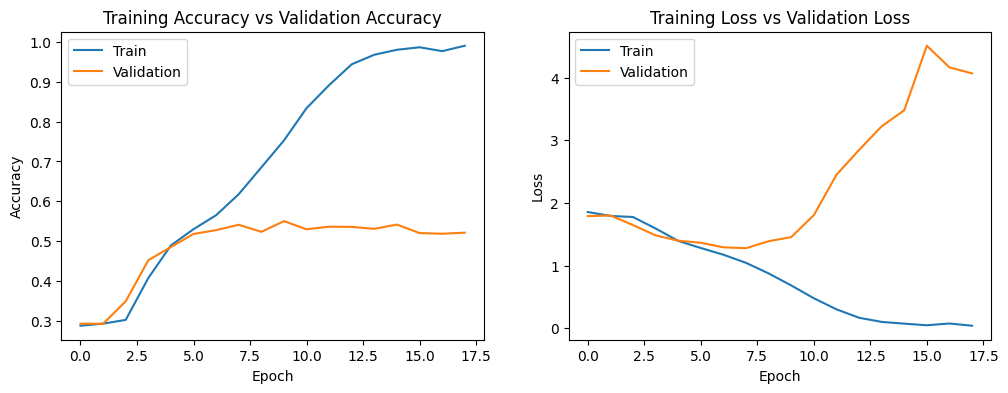

In [ ]:
import matplotlib.pyplot as plt
# Create plots for accuracy and loss.

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

ax[0].plot(history_cnn_base.history['accuracy'])
ax[0].plot(history_cnn_base.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history_cnn_base.history['loss'])
ax[1].plot(history_cnn_base.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

The first model seems to be overfitting as it performs significantly better on the training data compared to the validation data. This is evident from the increasing training accuracy and decreasing training loss, while the validation accuracy doesn't improve as much, and the validation loss starts increasing after a certain point.



### Adding drop out layers

In [ ]:
batch_size = 64
image_size = 48
num_classes = 7

# Build the base CNN model with Dropout layers
cnn_base = tf.keras.models.Sequential()

# First layer
cnn_base.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
cnn_base.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_base.add(layers.Dropout(0.25))  # Added Dropout layer

# Second layer
cnn_base.add(layers.Conv2D(128, (5, 5), activation='relu'))
cnn_base.add(layers.Dropout(0.25))  # Added Dropout layer

# Third layer
cnn_base.add(layers.Conv2D(512, (3, 3), activation='relu'))
cnn_base.add(layers.Dropout(0.25))  # Added Dropout layer

# Fourth layer
cnn_base.add(layers.Conv2D(256, (3, 3), activation='relu'))
cnn_base.add(layers.Dropout(0.25))  # Added Dropout layer

# Flatten and add fully connected layers
cnn_base.add(layers.Flatten())
cnn_base.add(layers.Dense(256, activation='relu'))
cnn_base.add(layers.Dropout(0.30))  # Added Dropout layer
cnn_base.add(layers.Dense(512, activation='relu'))
cnn_base.add(layers.Dropout(0.30))  # Added Dropout layer
cnn_base.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
cnn_base.compile(optimizer=Adam(learning_rate=0.001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Reshape the datasets to include the channel dimension (grayscale)
X_train_reshaped = X_train.reshape(-1, image_size, image_size, 1)
X_val_reshaped = X_val.reshape(-1, image_size, image_size, 1)

# Convert labels to one-hot encoding
y_train_onehot = to_categorical(y_train, num_classes)
y_val_onehot = to_categorical(y_val, num_classes)

# Initialize the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history_cnn_base = cnn_base.fit(X_train_reshaped, y_train_onehot,
                                validation_data=(X_val_reshaped, y_val_onehot),
                                epochs=50,
                                batch_size=batch_size,
                                callbacks=[early_stopping])


Epoch 1/50
117/117 [==============================] - 27s 185ms/step - loss: 1.9900 - accuracy: 0.2794 - val_loss: 1.7920 - val_accuracy: 0.2931
Epoch 2/50
117/117 [==============================] - 21s 178ms/step - loss: 1.7755 - accuracy: 0.2928 - val_loss: 1.7373 - val_accuracy: 0.2969
Epoch 3/50
117/117 [==============================] - 21s 180ms/step - loss: 1.6192 - accuracy: 0.3858 - val_loss: 1.4941 - val_accuracy: 0.4416
Epoch 4/50
117/117 [==============================] - 21s 178ms/step - loss: 1.5220 - accuracy: 0.4365 - val_loss: 1.4149 - val_accuracy: 0.4678
Epoch 5/50
117/117 [==============================] - 21s 178ms/step - loss: 1.4456 - accuracy: 0.4629 - val_loss: 1.3925 - val_accuracy: 0.4845
Epoch 6/50
117/117 [==============================] - 21s 179ms/step - loss: 1.4136 - accuracy: 0.4775 - val_loss: 1.3816 - val_accuracy: 0.4936
Epoch 7/50
117/117 [==============================] - 21s 179ms/step - loss: 1.3674 - accuracy: 0.4957 - val_loss: 1.3186 - val_ac

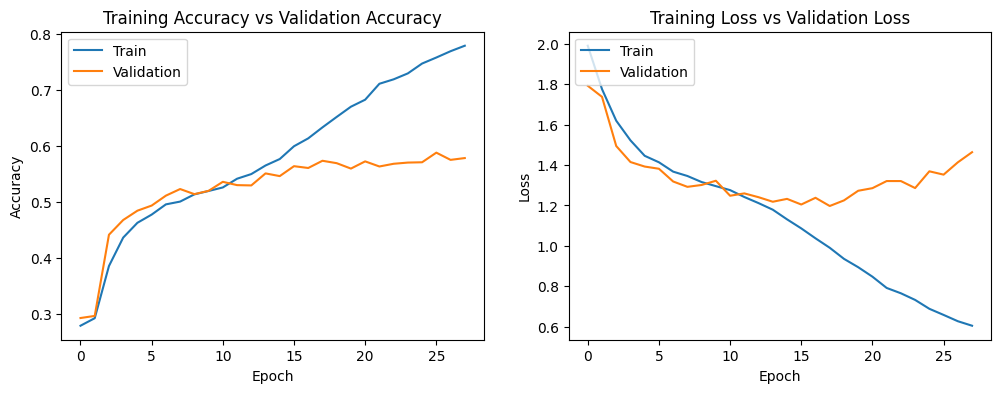

In [ ]:
# Create plots for accuracy and loss.

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

ax[0].plot(history_cnn_base.history['accuracy'])
ax[0].plot(history_cnn_base.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history_cnn_base.history['loss'])
ax[1].plot(history_cnn_base.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

When I added dropout layers in the second model, it helped in reducing overfitting. The training accuracy is lower compared to the first model, which is expected as dropout layers randomly set a fraction of input units to 0 at each update during training time, which helps to prevent overfitting. The validation accuracy of the second model is generally higher and more stable compared to the first model.

### Adding pooling layers

In [ ]:
# Build the CNN model
cnn_base = tf.keras.models.Sequential()

# First layer
cnn_base.add(layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)))
cnn_base.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_base.add(layers.MaxPooling2D(pool_size=(2, 2)))
cnn_base.add(layers.Dropout(0.25))

# Second layer
cnn_base.add(layers.Conv2D(128, (5, 5), padding='same', activation='relu'))
cnn_base.add(layers.MaxPooling2D(pool_size=(2, 2)))
cnn_base.add(layers.Dropout(0.25))

# Third layer
cnn_base.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
cnn_base.add(layers.MaxPooling2D(pool_size=(2, 2)))
cnn_base.add(layers.Dropout(0.25))

# Fourth layer
cnn_base.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_base.add(layers.MaxPooling2D(pool_size=(2, 2)))
cnn_base.add(layers.Dropout(0.25))

cnn_base.add(layers.Flatten())

# First fully connected layer
cnn_base.add(layers.Dense(256, activation='relu'))
cnn_base.add(layers.Dropout(0.30))

# Second fully connected layer
cnn_base.add(layers.Dense(512, activation='relu'))
cnn_base.add(layers.Dropout(0.30))

cnn_base.add(layers.Dense(7, activation='softmax'))
cnn_base.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model with early stopping
history_cnn_base = cnn_base.fit(X_train_reshaped, y_train_onehot,
                                validation_data=(X_val_reshaped, y_val_onehot),
                                epochs=50,
                                batch_size=batch_size,
                                callbacks=[early_stopping])


Epoch 1/50
117/117 [==============================] - 9s 49ms/step - loss: 1.8023 - accuracy: 0.2876 - val_loss: 1.7942 - val_accuracy: 0.2931
Epoch 2/50
117/117 [==============================] - 3s 29ms/step - loss: 1.7952 - accuracy: 0.2919 - val_loss: 1.7853 - val_accuracy: 0.2931
Epoch 3/50
117/117 [==============================] - 3s 29ms/step - loss: 1.7850 - accuracy: 0.2930 - val_loss: 1.7901 - val_accuracy: 0.2931
Epoch 4/50
117/117 [==============================] - 4s 31ms/step - loss: 1.7761 - accuracy: 0.2931 - val_loss: 1.7514 - val_accuracy: 0.2931
Epoch 5/50
117/117 [==============================] - 3s 29ms/step - loss: 1.7463 - accuracy: 0.3045 - val_loss: 1.6781 - val_accuracy: 0.3446
Epoch 6/50
117/117 [==============================] - 3s 29ms/step - loss: 1.6760 - accuracy: 0.3523 - val_loss: 1.4844 - val_accuracy: 0.4325
Epoch 7/50
117/117 [==============================] - 3s 29ms/step - loss: 1.4908 - accuracy: 0.4477 - val_loss: 1.3477 - val_accuracy: 0.5021

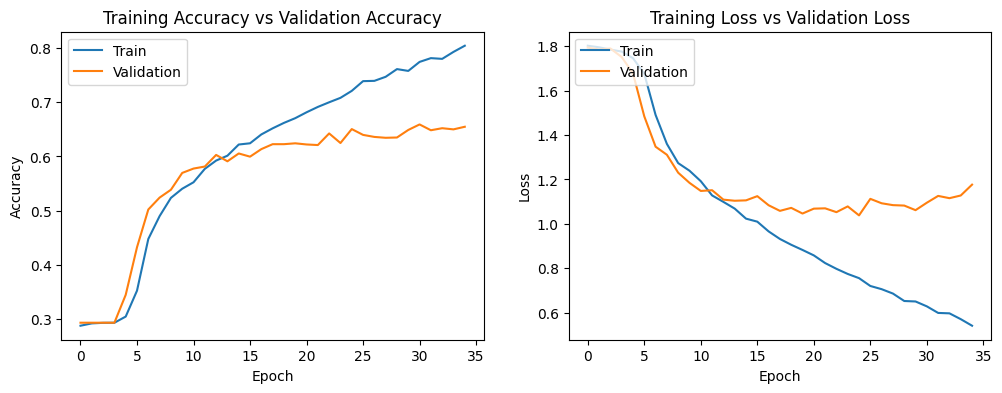

In [ ]:
# Create plots for accuracy and loss.

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

ax[0].plot(history_cnn_base.history['accuracy'])
ax[0].plot(history_cnn_base.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history_cnn_base.history['loss'])
ax[1].plot(history_cnn_base.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

The inclusion of max pooling layers has enhanced the model's efficiency and ability to generalize, as evidenced by improved accuracy scores on both training and validation datasets. Max pooling layers contribute to a reduction in the spatial dimensions of the input feature maps, leading to a decreased computational burden on the following layers. This adjustment is especially beneficial for deep network architectures and when dealing with large-sized images.

### Adding normalization layers

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import optimizers
from keras.models import Model,Sequential
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D, Activation
from tensorflow.keras.optimizers import Adam

# Get rid of warnings!
import warnings
warnings.filterwarnings('ignore')

batch_size = 64
image_size = 48

# Build the CNN model
cnni = tf.keras.models.Sequential()

# First layer
cnni.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
cnni.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
cnni.add(BatchNormalization())
cnni.add(MaxPooling2D(pool_size=(2, 2)))
cnni.add(Dropout(0.25))

# Second layer
cnni.add(Conv2D(128,(5,5), padding='same', activation='relu'))
cnni.add(BatchNormalization())
cnni.add(MaxPooling2D(pool_size=(2, 2)))
cnni.add(Dropout(0.25))

# Third layer
cnni.add(Conv2D(512,(3,3), padding='same', activation='relu'))
cnni.add(BatchNormalization())
cnni.add(MaxPooling2D(pool_size=(2, 2)))
cnni.add(Dropout(0.25))

# Fourth layer
cnni.add(Conv2D(256,(3,3), padding='same', activation='relu'))
cnni.add(BatchNormalization())
cnni.add(MaxPooling2D(pool_size=(2, 2)))
cnni.add(Dropout(0.25))

cnni.add(Flatten())

# First fully connected layer
cnni.add(Dense(256,activation = 'relu'))
cnni.add(BatchNormalization())
cnni.add(Dropout(0.30))

# Second fully connected layer
cnni.add(Dense(512,activation = 'relu'))
cnni.add(BatchNormalization())
cnni.add(Dropout(0.30))

cnni.add(Dense(7, activation='softmax'))
cnni.compile(
    optimizer = Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
# Reshape the datasets to include the channel dimension (grayscale)
X_train_reshaped = X_train.reshape(-1, image_size, image_size, 1)
X_val_reshaped = X_val.reshape(-1, image_size, image_size, 1)

# Convert labels to one-hot encoding
y_train_onehot = to_categorical(y_train)
y_val_onehot = to_categorical(y_val)

# Initialize the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history_cnni = cnni.fit(X_train_reshaped, y_train_onehot,
                    validation_data=(X_val_reshaped, y_val_onehot),
                    epochs=50,
                    batch_size=batch_size,
                    callbacks=[early_stopping])

Epoch 1/50
117/117 [==============================] - 4s 38ms/step - loss: 0.8533 - accuracy: 0.6853 - val_loss: 1.1730 - val_accuracy: 0.6040
Epoch 2/50
117/117 [==============================] - 4s 38ms/step - loss: 0.7813 - accuracy: 0.7101 - val_loss: 1.7795 - val_accuracy: 0.4577
Epoch 3/50
117/117 [==============================] - 4s 37ms/step - loss: 0.7538 - accuracy: 0.7213 - val_loss: 1.1077 - val_accuracy: 0.6045
Epoch 4/50
117/117 [==============================] - 4s 37ms/step - loss: 0.6708 - accuracy: 0.7534 - val_loss: 1.2154 - val_accuracy: 0.6200
Epoch 5/50
117/117 [==============================] - 4s 38ms/step - loss: 0.5814 - accuracy: 0.7858 - val_loss: 1.2565 - val_accuracy: 0.6147
Epoch 6/50
117/117 [==============================] - 4s 37ms/step - loss: 0.5448 - accuracy: 0.8011 - val_loss: 1.2263 - val_accuracy: 0.5997
Epoch 7/50
117/117 [==============================] - 4s 36ms/step - loss: 0.5118 - accuracy: 0.8141 - val_loss: 1.4435 - val_accuracy: 0.5750

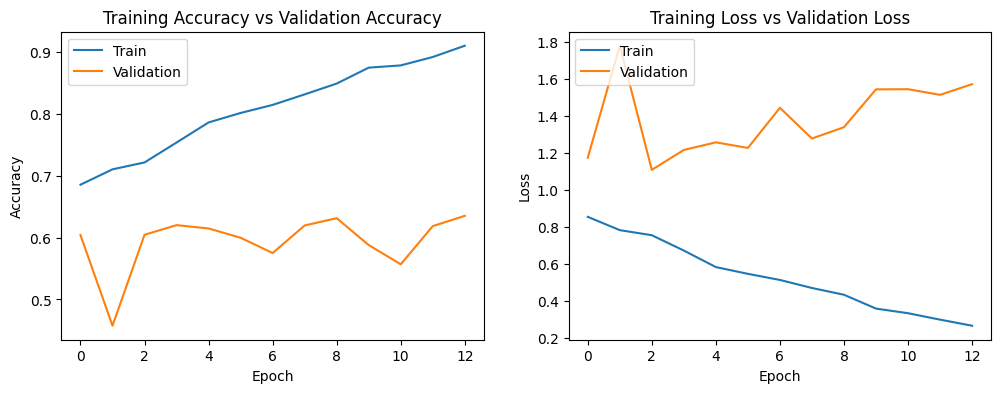

In [ ]:
import matplotlib.pyplot as plt
# Create plots for accuracy and loss.
train_acc = history_cnni.history['accuracy']
train_loss = history_cnni.history['loss']

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

ax[0].plot(history_cnni.history['accuracy'])
ax[0].plot(history_cnni.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history_cnni.history['loss'])
ax[1].plot(history_cnni.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()


The fourth model, with batch normalization layers added, exhibited faster convergence, reaching a higher training accuracy within fewer epochs. However, it seems that the model may have started overfitting quickly, as the validation accuracy peaked at 60.45% at epoch 3 before declining. Early stopping was triggered at epoch 13, indicating that the model's performance on the validation set was not improving.

Batch normalization helps in stabilizing and accelerating the training of deep networks. However, its effectiveness can be dependent on how it is applied and the specific characteristics of the dataset and task. In this case, it seems like adding batch normalization may have led to overfitting.

To address the issue of overfitting, I am planning to enhance the dataset through the implementation of data augmentation techniques, incorporate L2 regularization to penalize large weights, and employ a strategy to reduce the learning rate when the model’s performance plateaus.

### Data augmentation + Regularization + Reduce learning rate

Data augmentation is a technique to artificially create new training data from existing training data. This is achieved by applying a series of random transformations to the images in your dataset, resulting in a larger and more diverse dataset.

L2 regularization, also known as weight decay, adds a penalty on the size of the weights to the loss function. This encourages the model to maintain smaller weights, leading to a simpler model that is less likely to overfit.

Reduce Learning Rate on Plateau, reducing the learning rate when the model’s performance has stopped improving helps to fine-tune the weights and avoid overshooting the minimum of the loss function.

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow(X_train_reshaped, y_train_onehot, batch_size=batch_size)

# Reduce Learning Rate on Plateau
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=5, min_lr=1e-5, verbose=1)

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Model Definition with Regularization
cnnii = tf.keras.models.Sequential()

# First layer with L2 regularization
cnnii.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01), input_shape=(48, 48, 1)))
cnnii.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)))
cnnii.add(BatchNormalization())
cnnii.add(MaxPooling2D(pool_size=(2, 2)))
cnnii.add(Dropout(0.25))

# Second layer
cnnii.add(Conv2D(128, (5, 5), padding='same', activation='relu', kernel_regularizer=l2(0.01)))
cnnii.add(BatchNormalization())
cnnii.add(MaxPooling2D(pool_size=(2, 2)))
cnnii.add(Dropout(0.25))

# Third layer
cnnii.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)))
cnnii.add(BatchNormalization())
cnnii.add(MaxPooling2D(pool_size=(2, 2)))
cnnii.add(Dropout(0.25))

# Fourth layer
cnnii.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)))
cnnii.add(BatchNormalization())
cnnii.add(MaxPooling2D(pool_size=(2, 2)))
cnnii.add(Dropout(0.25))

cnnii.add(Flatten())

# First fully connected layer
cnnii.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
cnnii.add(BatchNormalization())
cnnii.add(Dropout(0.30))

# Second fully connected layer
cnnii.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
cnnii.add(BatchNormalization())
cnnii.add(Dropout(0.30))

cnnii.add(Dense(7, activation='softmax'))

# Compile Model
cnnii.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model with Early Stopping and ReduceLROnPlateau
history_cnnii = cnnii.fit(train_generator,
                    validation_data=(X_val_reshaped, y_val_onehot),
                    epochs=50,
                    steps_per_epoch=len(X_train_reshaped) // batch_size,
                    callbacks=[early_stopping, reduce_lr])


Epoch 1/50
116/116 [==============================] - 12s 45ms/step - loss: 15.0542 - accuracy: 0.2090 - val_loss: 11.7560 - val_accuracy: 0.1388 - lr: 0.0010
Epoch 2/50
116/116 [==============================] - 5s 46ms/step - loss: 8.9385 - accuracy: 0.2514 - val_loss: 6.6496 - val_accuracy: 0.2931 - lr: 0.0010
Epoch 3/50
116/116 [==============================] - 5s 43ms/step - loss: 5.2773 - accuracy: 0.2571 - val_loss: 4.2357 - val_accuracy: 0.2931 - lr: 0.0010
Epoch 4/50
116/116 [==============================] - 6s 55ms/step - loss: 3.8173 - accuracy: 0.2476 - val_loss: 3.2998 - val_accuracy: 0.2990 - lr: 0.0010
Epoch 5/50
116/116 [==============================] - 6s 53ms/step - loss: 2.9052 - accuracy: 0.2778 - val_loss: 2.6247 - val_accuracy: 0.2942 - lr: 0.0010
Epoch 6/50
116/116 [==============================] - 6s 54ms/step - loss: 2.5229 - accuracy: 0.3043 - val_loss: 2.6560 - val_accuracy: 0.2074 - lr: 0.0010
Epoch 7/50
116/116 [==============================] - 5s 42ms

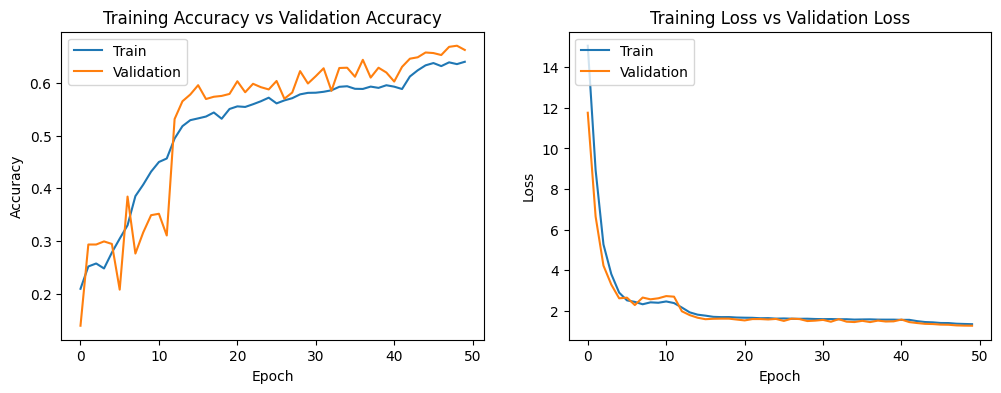

In [ ]:
# Create plots for accuracy and loss.
train_acc = history_cnnii.history['accuracy']
train_loss = history_cnnii.history['loss']

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

ax[0].plot(history_cnnii.history['accuracy'])
ax[0].plot(history_cnnii.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history_cnnii.history['loss'])
ax[1].plot(history_cnnii.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()


Training Loss: The model started with a very high training loss of 15.0542, but it consistently decreased over the epochs to 1.5012. This indicates that the model was learning and improving its predictions over time.

Training Accuracy: The training accuracy started at 20.90% and increased to 61.25% by the end of 50 epochs. This shows a clear improvement, though there is still room for further enhancement. Therefore, I increased the number of epoch to see how much the model can be enhanced.

Validation Loss: The validation loss started at 11.7560 and had fluctuations throughout the epochs. By the end of the training, it was at 1.5471. This indicates that the model is generalizing to unseen data, but there might be some overfitting as the validation loss is higher than the training loss in the later epochs.

Validation Accuracy: The validation accuracy started at 13.88% and increased to 64.58% by the end of the training. This improvement is a good sign, but similar to validation loss, the gap between training and validation accuracy suggests potential overfitting.

### Increasing number of epoch

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import optimizers
from keras.models import Model,Sequential
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

batch_size = 64
image_size = 48

# Reshape the datasets to include the channel dimension (grayscale)
X_train_reshaped = X_train.reshape(-1, image_size, image_size, 1)
X_val_reshaped = X_val.reshape(-1, image_size, image_size, 1)

# Convert labels to one-hot encoding
y_train_onehot = to_categorical(y_train)
y_val_onehot = to_categorical(y_val)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow(X_train_reshaped, y_train_onehot, batch_size=batch_size)

# Reduce Learning Rate on Plateau
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=5, min_lr=1e-5, verbose=1)

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

cnniii = tf.keras.models.Sequential()

# First layer with L2 regularization
cnniii.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01), input_shape=(48, 48, 1)))
cnniii.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)))
cnniii.add(BatchNormalization())
cnniii.add(MaxPooling2D(pool_size=(2, 2)))
cnniii.add(Dropout(0.25))

# Second layer
cnniii.add(Conv2D(128, (5, 5), padding='same', activation='relu', kernel_regularizer=l2(0.01)))
cnniii.add(BatchNormalization())
cnniii.add(MaxPooling2D(pool_size=(2, 2)))
cnniii.add(Dropout(0.25))

# Third layer
cnniii.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)))
cnniii.add(BatchNormalization())
cnniii.add(MaxPooling2D(pool_size=(2, 2)))
cnniii.add(Dropout(0.25))

# Fourth layer
cnniii.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)))
cnniii.add(BatchNormalization())
cnniii.add(MaxPooling2D(pool_size=(2, 2)))
cnniii.add(Dropout(0.25))

cnniii.add(Flatten())

# First fully connected layer
cnniii.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
cnniii.add(BatchNormalization())
cnniii.add(Dropout(0.30))

# Second fully connected layer
cnniii.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
cnniii.add(BatchNormalization())
cnniii.add(Dropout(0.30))

cnniii.add(Dense(7, activation='softmax'))

# Compile Model
cnniii.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model with Early Stopping and ReduceLROnPlateau
history_cnniii = cnniii.fit(train_generator,
                    validation_data=(X_val_reshaped, y_val_onehot),
                    epochs=200,
                    steps_per_epoch=len(X_train_reshaped) // batch_size,
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/200
116/116 [==============================] - 12s 53ms/step - loss: 15.2430 - accuracy: 0.2053 - val_loss: 12.3622 - val_accuracy: 0.3028 - lr: 0.0010
Epoch 2/200
116/116 [==============================] - 7s 56ms/step - loss: 9.4598 - accuracy: 0.2416 - val_loss: 7.5506 - val_accuracy: 0.2931 - lr: 0.0010
Epoch 3/200
116/116 [==============================] - 6s 55ms/step - loss: 5.7549 - accuracy: 0.2544 - val_loss: 4.6973 - val_accuracy: 0.2931 - lr: 0.0010
Epoch 4/200
116/116 [==============================] - 5s 44ms/step - loss: 3.8982 - accuracy: 0.2612 - val_loss: 3.5202 - val_accuracy: 0.2931 - lr: 0.0010
Epoch 5/200
116/116 [==============================] - 5s 43ms/step - loss: 2.9891 - accuracy: 0.2659 - val_loss: 2.6762 - val_accuracy: 0.2931 - lr: 0.0010
Epoch 6/200
116/116 [==============================] - ETA: 0s - loss: 2.5224 - accuracy: 0.2802
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
116/116 [=============================

Training Loss: The training loss started at 15.2430 and gradually decreased over the epochs, reaching 1.1399 by the end of training. This indicates that the model continued to learn and improve its predictions as the number of epochs increased.

Training Accuracy: The training accuracy started at 20.53% and increased to 68.79% by the end of training. This shows significant improvement in the model's ability to classify data correctly.

Validation Loss: The validation loss started at 12.3622 and also decreased over time, reaching 1.1655. This suggests that the model was able to generalize well to the validation data.

Validation Accuracy: The validation accuracy started at 30.28% and increased to 68.97% by the end of training. This indicates that the model was able to perform well on unseen data.

### Adding 5 more layers

In [ ]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Initialize the model
cnniv = Sequential()

# First layer with L2 regularization
cnniv.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01), input_shape=(48, 48, 1)))
cnniv.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)))
cnniv.add(BatchNormalization())
cnniv.add(MaxPooling2D(pool_size=(2, 2)))
cnniv.add(Dropout(0.25))

# Second layer
cnniv.add(Conv2D(128, (5, 5), padding='same', activation='relu', kernel_regularizer=l2(0.01)))
cnniv.add(BatchNormalization())
cnniv.add(MaxPooling2D(pool_size=(2, 2)))
cnniv.add(Dropout(0.25))

# Third layer
cnniv.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)))
cnniv.add(BatchNormalization())
cnniv.add(MaxPooling2D(pool_size=(2, 2)))
cnniv.add(Dropout(0.25))

# Fourth layer
cnniv.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)))
cnniv.add(BatchNormalization())
cnniv.add(MaxPooling2D(pool_size=(2, 2)))
cnniv.add(Dropout(0.25))

cnniv.add(Flatten())

# First fully connected layer
cnniv.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
cnniv.add(BatchNormalization())
cnniv.add(Dropout(0.30))

# Additional Dense Layers
cnniv.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
cnniv.add(BatchNormalization())
cnniv.add(Dropout(0.25))

cnniv.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
cnniv.add(BatchNormalization())
cnniv.add(Dropout(0.25))

cnniv.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
cnniv.add(BatchNormalization())
cnniv.add(Dropout(0.25))

# Second fully connected layer (original)
cnniv.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
cnniv.add(BatchNormalization())
cnniv.add(Dropout(0.30))

cnniv.add(Dense(7, activation='softmax'))

# Compile Model
cnniv.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model with Early Stopping and ReduceLROnPlateau
history_cnniv = cnniv.fit(train_generator,
                    validation_data=(X_val_reshaped, y_val_onehot),
                    epochs=200,
                    steps_per_epoch=len(X_train_reshaped) // batch_size,
                    callbacks=[early_stopping, reduce_lr])


Epoch 1/200
116/116 [==============================] - 22s 75ms/step - loss: 16.4759 - accuracy: 0.1945 - val_loss: 14.3360 - val_accuracy: 0.2931 - lr: 0.0010
Epoch 2/200
116/116 [==============================] - 7s 57ms/step - loss: 12.3962 - accuracy: 0.2301 - val_loss: 10.2522 - val_accuracy: 0.2931 - lr: 0.0010
Epoch 3/200
116/116 [==============================] - 6s 48ms/step - loss: 8.8466 - accuracy: 0.2314 - val_loss: 7.2864 - val_accuracy: 0.2931 - lr: 0.0010
Epoch 4/200
116/116 [==============================] - 7s 58ms/step - loss: 6.4347 - accuracy: 0.2506 - val_loss: 5.4585 - val_accuracy: 0.2931 - lr: 0.0010
Epoch 5/200
116/116 [==============================] - 7s 59ms/step - loss: 4.9160 - accuracy: 0.2578 - val_loss: 4.2671 - val_accuracy: 0.2931 - lr: 0.0010
Epoch 6/200
115/116 [============================>.] - ETA: 0s - loss: 3.9441 - accuracy: 0.2589
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
116/116 [===========================

After adding five additional dense layers into the model, it appears that further improvements in accuracy are not achievable. As such, I have saved the model with the highest recorded accuracy for future use in predicting outcomes on public datasets.

In [ ]:
# Save the best cnn model
cnn_model_save_path = '/content/drive/My Drive/Colab Notebooks/ML Major project/cnniii_model.h5'
cnniii.save(cnn_model_save_path)
print(f"CNN model saved to '{cnn_model_save_path}'.")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


CNN model saved to '/content/drive/My Drive/Colab Notebooks/ML Major project/cnniii_model.h5'.


## Pre-trained model
Transfer learning is a powerful technique that involves leveraging pre-trained model knowledge to enhance a model's performance, especially when there is limited labeled data for your specific task. Pre-trained models have already acquired a wealth of rich, hierarchical features from extensive datasets, such as ImageNet. These learned features are highly valuable for identifying intricate patterns and representations within images.

In my approach to classifying human facial expressions, I find it really helpful to use pre-trained models like MobileNetV2, VGG16, ResNet, and InceptionV3.

### MobileNetV2

In [ ]:
from tensorflow.keras.applications import MobileNetV2

images_train = np.load(join(dataset_directory, 'Training_data_images.npy'))
X_train, X_val, y_train, y_val = train_test_split(images_train, labels_train, test_size=0.2, stratify=labels_train, random_state=42)

# Revised preprocessing function
def preprocess_data(images):
    # Reshape the images to have a channel dimension
    images = images[..., tf.newaxis]
    # Resize images
    resized_images = tf.image.resize(images, [96, 96])
    # Convert grayscale to RGB
    rgb_images = tf.tile(resized_images, [1, 1, 1, 3])
    return rgb_images

# Preprocess training and validation data
X_train_rgb = preprocess_data(X_train)
X_val_rgb = preprocess_data(X_val)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

datagen.fit(X_train_rgb)

# Convert labels to one-hot encoding
y_train_categorical = to_categorical(y_train, len(EMOTIONS))
y_val_categorical = to_categorical(y_val, len(EMOTIONS))

# Define MobileNetV2 model with modifications for emotion classification
def build_mobilenet_model():
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(96, 96, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    predictions = Dense(len(EMOTIONS), activation='softmax')(x)
    mobilenet_model = Model(inputs=base_model.input, outputs=predictions)

    return mobilenet_model

# Build the model
mobilenet_model = build_mobilenet_model()

mobilenet_model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history_mobilenet = mobilenet_model.fit(
    datagen.flow(X_train_rgb, y_train_categorical, batch_size=64),
    validation_data=(X_val_rgb, y_val_categorical),
    epochs=100,
    callbacks=[early_stopping]
)

9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/100
117/117 [==============================] - 57s 216ms/step - loss: 1.6875 - accuracy: 0.4165 - val_loss: 3.4339 - val_accuracy: 0.3049
Epoch 2/100
117/117 [==============================] - 23s 198ms/step - loss: 1.2803 - accuracy: 0.5405 - val_loss: 6.1571 - val_accuracy: 0.2937
Epoch 3/100
117/117 [==============================] - 25s 214ms/step - loss: 1.1874 - accuracy: 0.5662 - val_loss: 5.4923 - val_accuracy: 0.3167
Epoch 4/100
117/117 [==============================] - 23s 195ms/step - loss: 1.1240 - accuracy: 0.5915 - val_loss: 3.4844 - val_accuracy: 0.4507
Epoch 5/100
117/117 [==============================] - 22s 188ms/step - loss: 1.0612 - accuracy: 0.6076 - val_loss: 5.3000 - val_accuracy: 0.3623
Epoch 6/100
117/117 [==============================] - 24s 205ms/step - loss: 1.0488 - accuracy: 0.6177 - val_loss: 3.5400 - val_accuracy: 0.4373


### VGG16

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten

# Create the base model from the pre-trained VGG16 model
base_model_vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(96, 96, 3))

# Create a new model on top of the base model
vgg16_model = Sequential([
    base_model_vgg16,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(len(EMOTIONS), activation='softmax')
])

vgg16_model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history_vgg16 = vgg16_model.fit(
    datagen.flow(X_train_rgb, y_train_categorical, batch_size=64),
    validation_data=(X_val_rgb, y_val_categorical),
    epochs=100,
    callbacks=[early_stopping]
)

Epoch 1/100
117/117 [==============================] - 40s 260ms/step - loss: 2.0657 - accuracy: 0.2822 - val_loss: 1.7886 - val_accuracy: 0.2931
Epoch 2/100
117/117 [==============================] - 29s 244ms/step - loss: 1.7997 - accuracy: 0.2879 - val_loss: 1.7809 - val_accuracy: 0.2931
Epoch 3/100
117/117 [==============================] - 27s 234ms/step - loss: 1.7985 - accuracy: 0.2892 - val_loss: 1.7828 - val_accuracy: 0.2931
Epoch 4/100
117/117 [==============================] - 28s 235ms/step - loss: 1.7995 - accuracy: 0.2908 - val_loss: 1.7920 - val_accuracy: 0.2931
Epoch 5/100
117/117 [==============================] - 29s 244ms/step - loss: 1.7953 - accuracy: 0.2936 - val_loss: 1.7868 - val_accuracy: 0.2931
Epoch 6/100
117/117 [==============================] - 28s 237ms/step - loss: 1.7850 - accuracy: 0.2934 - val_loss: 1.7798 - val_accuracy: 0.2931
Epoch 7/100
117/117 [==============================] - 29s 243ms/step - loss: 1.7881 - accuracy: 0.2915 - val_loss: 1.7450 -

### ResNet

In [ ]:
from tensorflow.keras.applications import ResNet50

# Create the base model from the pre-trained ResNet50 model
base_model_resnet50 = ResNet50(include_top=False, weights='imagenet', input_shape=(96, 96, 3))

# Create a new model on top of the base ResNet50 model
resnet50_model = Sequential([
    base_model_resnet50,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(len(EMOTIONS), activation='softmax')
])

resnet50_model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the ResNet50 model with early stopping
history_resnet50 = resnet50_model.fit(
    datagen.flow(X_train_rgb, y_train_categorical, batch_size=64),
    validation_data=(X_val_rgb, y_val_categorical),
    epochs=100,
    callbacks=[early_stopping]
)

94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/100
117/117 [==============================] - 77s 304ms/step - loss: 2.0012 - accuracy: 0.3425 - val_loss: 56.4365 - val_accuracy: 0.2931
Epoch 2/100
117/117 [==============================] - 31s 260ms/step - loss: 1.5926 - accuracy: 0.4382 - val_loss: 2.5441 - val_accuracy: 0.2053
Epoch 3/100
117/117 [==============================] - 29s 245ms/step - loss: 1.3944 - accuracy: 0.5082 - val_loss: 2.5180 - val_accuracy: 0.1356
Epoch 4/100
117/117 [==============================] - 28s 236ms/step - loss: 1.2545 - accuracy: 0.5399 - val_loss: 1.9601 - val_accuracy: 0.2026
Epoch 5/100
117/117 [==============================] - 29s 244ms/step - loss: 1.1872 - accuracy: 0.5590 - val_loss: 1.8320 - val_accuracy: 0.2964
Epoch 6/100
117/117 [==============================] - 28s 242ms/step - loss: 1.1808 - accuracy: 0.5720 - val_loss: 1.8787 - val_accuracy: 0.1967
Epoch 7/100
117/117 [==============================] - 29s

### InceptionV3

In [ ]:
from tensorflow.keras.applications import InceptionV3

# Create the base model from the pre-trained InceptionV3 model
base_model_inceptionv3 = InceptionV3(include_top=False, weights='imagenet', input_shape=(96, 96, 3))

# Create a new model on top of the base InceptionV3 model
inceptionv3_model = Sequential([
    base_model_inceptionv3,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(len(EMOTIONS), activation='softmax')
])

inceptionv3_model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the InceptionV3 model with early stopping
history_inceptionv3 = inceptionv3_model.fit(
    datagen.flow(X_train_rgb, y_train_categorical, batch_size=64),
    validation_data=(X_val_rgb, y_val_categorical),
    epochs=100,
    callbacks=[early_stopping]
)

87910968/87910968 [==============================] - 1s 0us/step
Epoch 1/100
117/117 [==============================] - 80s 328ms/step - loss: 1.8667 - accuracy: 0.3037 - val_loss: 58.8255 - val_accuracy: 0.2492
Epoch 2/100
117/117 [==============================] - 23s 192ms/step - loss: 1.7034 - accuracy: 0.3975 - val_loss: 2.8816 - val_accuracy: 0.3419
Epoch 3/100
117/117 [==============================] - 24s 205ms/step - loss: 1.7125 - accuracy: 0.4010 - val_loss: 432250.7500 - val_accuracy: 0.2053
Epoch 4/100
117/117 [==============================] - 23s 198ms/step - loss: 1.8479 - accuracy: 0.3562 - val_loss: 1662.9038 - val_accuracy: 0.1184
Epoch 5/100
117/117 [==============================] - 27s 232ms/step - loss: 1.7807 - accuracy: 0.3933 - val_loss: 1.7576 - val_accuracy: 0.3494
Epoch 6/100
117/117 [==============================] - 25s 211ms/step - loss: 1.7245 - accuracy: 0.4133 - val_loss: 65.5070 - val_accuracy: 0.2856
Epoch 7/100
117/117 [============================

summarise the result

In [ ]:
import pandas as pd

def summarize_accuracy(models, model_names):
    # Get the final validation accuracy for each model
    final_val_accuracies = [model.history['val_accuracy'][-1] for model in models]

    # Create a DataFrame to display the results
    df = pd.DataFrame({
        'Model Name': model_names,
        'Final Validation Accuracy': final_val_accuracies
    })

    # Sort the DataFrame based on accuracy
    df = df.sort_values(by='Final Validation Accuracy', ascending=False)

    return df

# history_mobilenet, history_vgg16, history_vgg19, history_resnet50, history_inceptionv3

accuracy_summary = summarize_accuracy(
    [history_mobilenet, history_vgg16, history_resnet50, history_inceptionv3],
    ['MobileNet', 'VGG16', 'ResNet50', 'InceptionV3'])

display(accuracy_summary)

,Model Name,Final Validation Accuracy
1,VGG16,0.625402
2,ResNet50,0.618971
0,MobileNet,0.437299
3,InceptionV3,0.400322


Initially, I took these pre-trained models and froze all their layers. Freezing prevents the weights and information learned by these layers from being altered during subsequent training. Despite starting with a strong foundation from these pre-trained models, the initial accuracy was disappointingly low, remaining about 30%. This low accuracy indicates that the features learned by these models on their original tasks might not be directly applicable to the specific problem I was trying to solve. Consequently, I decided to unfreeze all the layers of these pre-trained models. This allowed me to fine-tune the model's parameters and adapt them to the nuances of my particular dataset. After unfreezing the layers and conducting further training, the model's performance improved significantly. Fine-tuning the pre-trained models enabled them to learn features and representations that were more relevant to my specific classification task. This led to better accuracy and the model's ability to make more accurate predictions. The final validation accuracy results showed that VGG16 outperformed the others, reaching an accuracy of 62.54%. As a result, I have chosen to focus on fine-tuning the VGG16 model to achieve even better performance in my task of interest.

In [ ]:
# Save the best model
vgg16_model_save_path = '/content/drive/My Drive/Colab Notebooks/ML Major project/vgg16_model.h5'
vgg16_model.save(vgg16_model_save_path)
print(f"VGG16 model saved to '{vgg16_model_save_path}'.")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


VGG16 model saved to '/content/drive/My Drive/Colab Notebooks/ML Major project/vgg16_model.h5'.


## Tuning VGG16

### Loading new data set

The FER 2013 dataset is a collection of grayscale facial images containing various emotional expressions. It consists of 35,887 images categorized into seven emotions: Angry, Disgust, Fear, Happy, Sad, Surprise, and Neutral. This dataset is widely used for training and evaluating emotion recognition models in the fields of computer vision and machine learning, with applications in areas like human-computer interaction and sentiment analysis. The images are typically 48x48 pixels in size, making them suitable for developing machine learning and deep learning algorithms for facial expression analysis. Since this dataset shares the same attributes as the training dataset but offers a larger quantity of data, my plan is to utilize this dataset to enhance the model's performance. Link to download data set: [FER 2013 Dataset on Kaggle](https://www.kaggle.com/datasets/msambare/fer2013)


In [ ]:
import pandas as pd
import numpy as np
from os.path import join
from google.colab import drive
drive.mount('/content/drive/')

image_size = 48
EMOTIONS = ['angry', 'disgusted', 'fearful','happy', 'sad', 'surprised', 'neutral']
dataset_directory = '/content/drive/My Drive/Colab Notebooks/ML Major project/emotion-recognition-from-human-faces'

# Load the dataset from the CSV file
fer = pd.read_csv(join(dataset_directory, 'fer2013.csv'))

# Convert the pixels column to a numpy array
fer_images = fer['pixels'].apply(lambda x: np.array(x.split(), dtype=np.uint8).reshape(image_size, image_size))

# Convert the pixels column in df to a numpy array format similar to images_train
fer_images_array = np.array([img for img in fer_images])

# Extracting the images and labels as numpy arrays
images_train_fer = np.array([img for img in fer_images])
labels_train_fer = fer['emotion'].values

# Normalizing the images
images_train_fer = images_train_fer / 255.0

images_train_fer.shape, labels_train_fer.shape

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


((35887, 48, 48), (35887,))

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and validation sets (80-20 split) with stratification
X_train, X_val, y_train, y_val = train_test_split(images_train_fer, labels_train_fer, test_size=0.2, stratify=labels_train_fer, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)

Training set shape: (28709, 48, 48) (28709,)
Validation set shape: (7178, 48, 48) (7178,)


### Data exploration

In [ ]:
# Counting the distribution of emotions in labels_train
train_distribution = np.bincount(labels_train)
train_distribution_dict = {EMOTIONS[i]: train_distribution[i] for i in range(len(EMOTIONS))}

# Counting the distribution of emotions in the fer dataframe
fer_distribution = fer['emotion'].value_counts().sort_index()
fer_distribution_dict = {EMOTIONS[i]: fer_distribution[i] for i in range(len(EMOTIONS))}

train_distribution_dict, fer_distribution_dict

({'angry': 1266,
  'disgusted': 211,
  'fearful': 1107,
  'happy': 2736,
  'sad': 1043,
  'surprised': 1052,
  'neutral': 1913},
 {'angry': 4953,
  'disgusted': 547,
  'fearful': 5121,
  'happy': 8989,
  'sad': 6077,
  'surprised': 4002,
  'neutral': 6198})

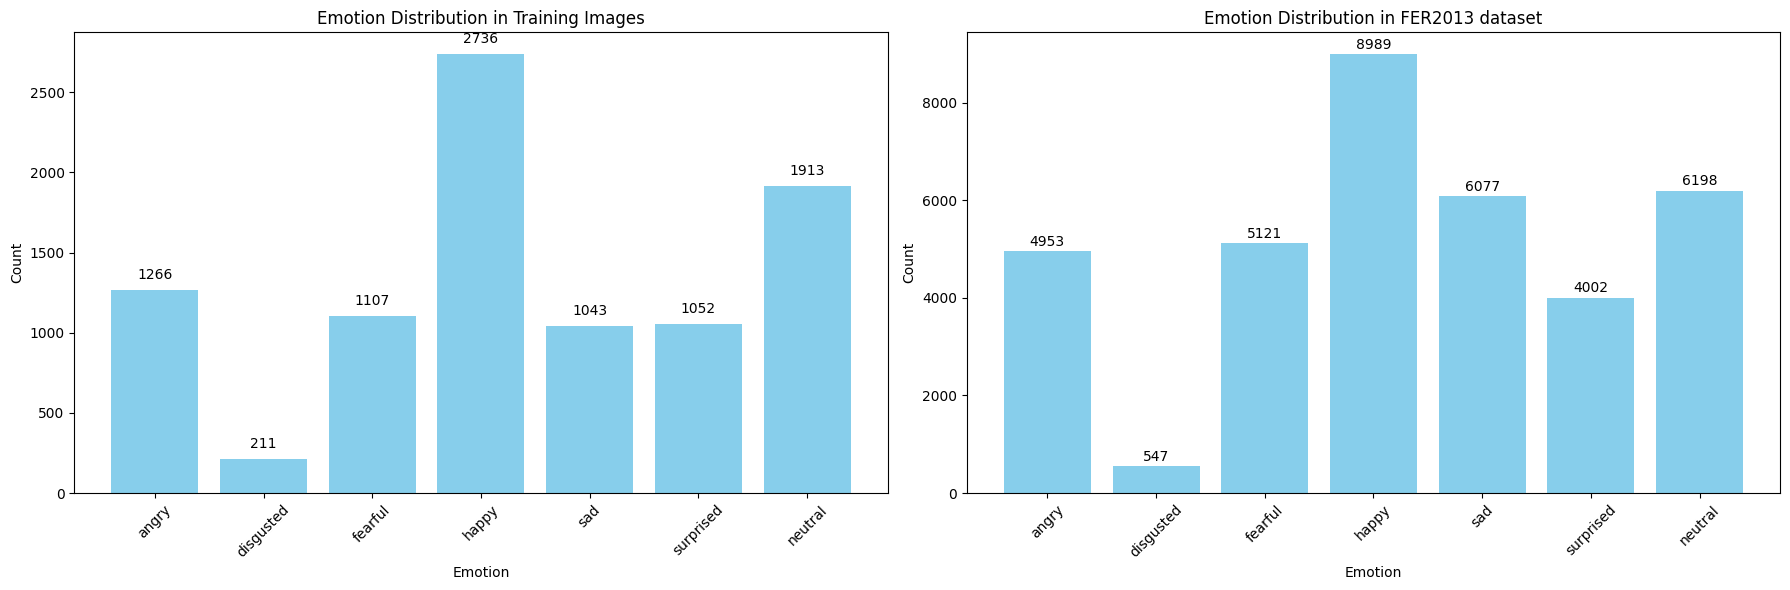

In [ ]:
def plot_distributions_side_by_side(train_data_dict, fer_data_dict):
    """
    Plots two bar charts side by side for the emotion distribution with counts on top of each bar.
    """
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

    for ax, data_dict, title in zip(axes, [train_data_dict, fer_data_dict],
                                    ['Emotion Distribution in Training Images', 'Emotion Distribution in FER2013 dataset']):
        emotions = list(data_dict.keys())
        counts = list(data_dict.values())
        bars = ax.bar(emotions, counts, color='skyblue')

        # Add counts on top of each bar
        for bar in bars:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, yval + 50, round(yval, 2), ha='center', va='bottom', fontsize=10)

        ax.set_title(title)
        ax.set_ylabel('Count')
        ax.set_xlabel('Emotion')
        ax.set_xticks(emotions)
        ax.set_xticklabels(emotions, rotation=45)

    plt.tight_layout()
    plt.show()

# Plot the distributions side by side
plot_distributions_side_by_side(train_distribution_dict, fer_distribution_dict)

These plots provide an overview of how the distribution of emotion classes varies between the training dataset and the FER2013 dataset.
This plot reveals a significant class label imbalance in both the training dataset and the FER2013 dataset. The most abundant class in both datasets is 'happy,' closely followed by 'neutral.' In contrast, 'disgusted' contains the least number of samples and is notably underrepresented compared to the other emotion labels.

### Applying modified VGG19 model

VGG16:
VGG16, short for "Visual Geometry Group 16," is a convolutional neural network (CNN) architecture developed by the Visual Geometry Group at the University of Oxford. It was introduced in the paper titled "Very Deep Convolutional Networks for Large-Scale Image Recognition" by Simonyan and Zisserman in 2014. VGG16 is renowned for its simplicity and effectiveness in image classification tasks. It consists of 16 weight layers, including 13 convolutional layers and 3 fully connected layers. The network employs 3x3 convolutional filters with small strides and uses max-pooling layers to downsample the spatial dimensions. VGG16 has been pre-trained on large-scale image datasets like ImageNet and can be fine-tuned for various computer vision tasks, making it a popular choice for transfer learning.

VGG19:
VGG19, an extension of VGG16, shares the same fundamental architecture principles but includes 19 weight layers. Like VGG16, it uses 3x3 convolutional filters and max-pooling layers. The additional layers in VGG19 increase its representational capacity, allowing it to capture more complex features in images. This model was also introduced by the Visual Geometry Group at the University of Oxford and is suitable for tasks such as image classification, object detection, and feature extraction. Due to its deeper architecture, VGG19 may perform slightly better than VGG16 on certain tasks that require a higher level of feature abstraction.

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Reshape the datasets to include the channel dimension (grayscale)
X_train_reshaped = X_train.reshape(-1, image_size, image_size, 1)
X_val_reshaped = X_val.reshape(-1, image_size, image_size, 1)

# Convert labels to one-hot encoding
y_train_onehot = to_categorical(y_train)
y_val_onehot = to_categorical(y_val)

batch_size = 256
image_size = 48
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow(X_train_reshaped, y_train_onehot, batch_size=batch_size)

# Convert grayscale images to RGB
X_train_rgb = np.repeat(X_train_reshaped, 3, axis=-1)
X_val_rgb = np.repeat(X_val_reshaped, 3, axis=-1)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import optimizers

IMG_WIDTH, IMG_HEIGHT, CHANNELS = 48, 48, 1  # Set image dimensions and channels

# Instantiate the VGG19 model with imagenet weights, without top layers and adjusted input shape for RGB
vgg = tf.keras.applications.VGG19(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))

# Model structure
x = vgg.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)  # Adding Dropout
output = Dense(7, activation='softmax', name='output_layer', kernel_regularizer=l2(0.01))(x)  # Adding L2 regularization

# Combine the VGG19 model with the additional layers
vgg19_model = tf.keras.Model(vgg.input, output)

early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0.00005, patience=11, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=7, min_lr=1e-7, verbose=1)
callbacks = [early_stopping, reduce_lr]

batch_size = 256
epochs = 100

vgg19_model.compile(loss='categorical_crossentropy',
                    optimizer=optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999),
                    metrics=['accuracy'])

# Train the model with early stopping
history_vgg19 = vgg19_model.fit(
    datagen.flow(X_train_rgb, y_train_onehot, batch_size=256),
    validation_data=(X_val_rgb, y_val_onehot),
    epochs=100,
    callbacks=[early_stopping]
)

80134624/80134624 [==============================] - 0s 0us/step
Epoch 1/100
113/113 [==============================] - 62s 366ms/step - loss: 1.9739 - accuracy: 0.2304 - val_loss: 1.7919 - val_accuracy: 0.3144
Epoch 2/100
113/113 [==============================] - 40s 356ms/step - loss: 1.7619 - accuracy: 0.3381 - val_loss: 1.5749 - val_accuracy: 0.4118
Epoch 3/100
113/113 [==============================] - 40s 356ms/step - loss: 1.5577 - accuracy: 0.4323 - val_loss: 1.4193 - val_accuracy: 0.4744
Epoch 4/100
113/113 [==============================] - 40s 353ms/step - loss: 1.4377 - accuracy: 0.4795 - val_loss: 1.2844 - val_accuracy: 0.5386
Epoch 5/100
113/113 [==============================] - 41s 359ms/step - loss: 1.3693 - accuracy: 0.5010 - val_loss: 1.1837 - val_accuracy: 0.5773
Epoch 6/100
113/113 [==============================] - 37s 328ms/step - loss: 1.2972 - accuracy: 0.5301 - val_loss: 1.1675 - val_accuracy: 0.5737
Epoch 7/100
113/113 [==============================] - 38s 

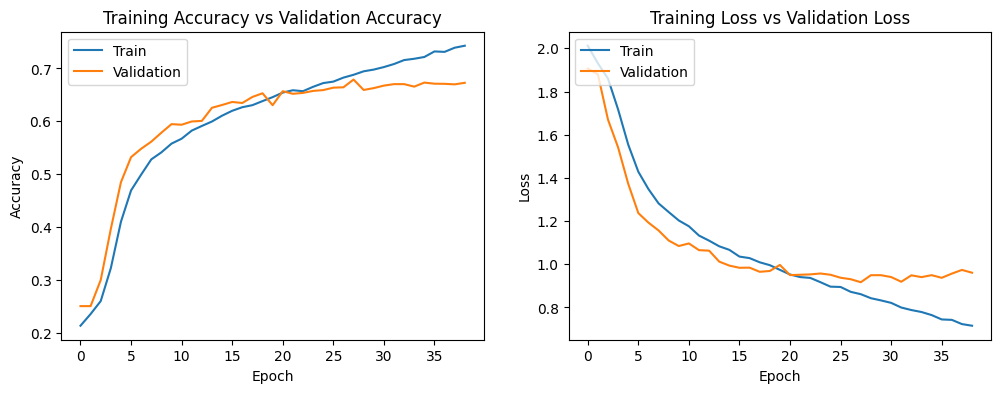

In [ ]:
import matplotlib.pyplot as plt
# Create plots for accuracy and loss.
train_acc = history_vgg19.history['accuracy']
train_loss = history_vgg19.history['loss']

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

ax[0].plot(history_vgg19.history['accuracy'])
ax[0].plot(history_vgg19.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history_vgg19.history['loss'])
ax[1].plot(history_vgg19.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

Both training and validation loss are decreasing over epochs, indicating that the model is learning from the data and becoming better at minimizing the loss function. Training accuracy is improving, which is expected as the model learns from the training data. Validation accuracy is also increasing, albeit more slowly. This suggests that the model is generalizing well to some extent, but there may be room for further improvement.

The training process stopped after Epoch 59 due to early stopping. The model's best performance on the validation dataset occurred at Epoch 48, with a validation accuracy of approximately 68.84%.

In [ ]:
# Save the model
model_save_path = '/content/drive/My Drive/Colab Notebooks/ML Major project/vgg19_model.h5'
vgg19_model.save(model_save_path)
print(f"VGG16 model saved to '{model_save_path}'.")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


VGG16 model saved to '/content/drive/My Drive/Colab Notebooks/ML Major project/vgg19_model.h5'.


225/225 [==============================] - 3s 14ms/step


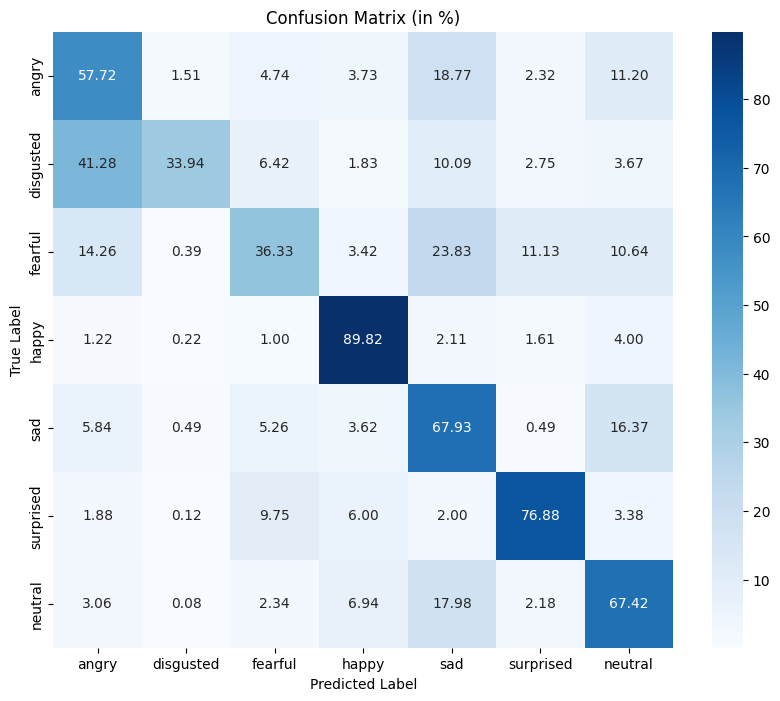

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict class labels for the validation set
y_pred = vgg19_model.predict(X_val_rgb)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val_onehot, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Normalize the confusion matrix
confusion_mtx_percentage = confusion_mtx.astype('float') / confusion_mtx.sum(axis=1)[:, np.newaxis]
confusion_mtx_percentage = np.round(confusion_mtx_percentage * 100, 2)  # round to two decimal places

# Plot the normalized confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx_percentage, annot=True, fmt=".2f", cmap="Blues", xticklabels=EMOTIONS, yticklabels=EMOTIONS)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (in %)')
plt.show()



The confusion matrix highlights that 'disgusted' and 'fearful' emotions have the lowest accuracy in classification. This can be attributed to 'disgusted' having the fewest data samples, making it challenging for the model to learn and generalize effectively. Additionally, 'fearful' is a complex emotion, which adds another layer of difficulty for the model to discern accurately, resulting in lower accuracy for this emotion category. To address the issue of class imbalance, I plan to employ class weights and oversampling.

### Class weight
Class weights are a technique used in machine learning to give different levels of importance to different classes in a classification problem. They are used to address class imbalance, where some classes have significantly fewer samples than others. Class weights assign higher weights to underrepresented classes and lower weights to overrepresented classes during model training. This helps the model to pay more attention to the minority classes and can improve its ability to correctly classify them. Class weights are typically used in scenarios where the imbalance between classes is significant, such as medical diagnosis or fraud detection, to ensure that the model doesn't become biased towards the majority class.

In [ ]:
import numpy as np
from sklearn.utils import class_weight
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Convert grayscale images to RGB
X_train_rgb = np.repeat(X_train_reshaped, 3, axis=-1)
X_val_rgb = np.repeat(X_val_reshaped, 3, axis=-1)

# Calculate class weights
y_train_labels = np.argmax(y_train_onehot, axis=1)  # Convert one-hot to label encoding

sample_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train_labels)

# Convert sample weights to class weights (for use in the model's fit method)
unique_labels = np.unique(y_train_labels)
class_weights = dict(zip(unique_labels, sample_weights))

# Load the saved model
model_path = '/content/drive/My Drive/Colab Notebooks/ML Major project/vgg19_model.h5'
vgg19_model = tf.keras.models.load_model(model_path)

early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0.00005, patience=11, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=7, min_lr=1e-7, verbose=1)
callbacks = [early_stopping, reduce_lr]

# Fit the model to your data with class weights
history_vgg19_class_weight = vgg19_model.fit(X_train_rgb, y_train_onehot,
                          validation_data=(X_val_rgb, y_val_onehot),
                          epochs=50,
                          batch_size=256,
                          class_weight=class_weights,
                          callbacks=callbacks)


Epoch 1/50
113/113 [==============================] - 50s 256ms/step - loss: 0.0149 - accuracy: 0.9972 - val_loss: 2.9599 - val_accuracy: 0.6669 - lr: 1.2500e-05
Epoch 2/50
113/113 [==============================] - 27s 236ms/step - loss: 0.0145 - accuracy: 0.9974 - val_loss: 3.0040 - val_accuracy: 0.6686 - lr: 1.2500e-05
Epoch 3/50
113/113 [==============================] - 28s 250ms/step - loss: 0.0143 - accuracy: 0.9973 - val_loss: 3.0364 - val_accuracy: 0.6687 - lr: 1.2500e-05
Epoch 4/50
113/113 [==============================] - 28s 252ms/step - loss: 0.0147 - accuracy: 0.9970 - val_loss: 2.9460 - val_accuracy: 0.6691 - lr: 1.2500e-05
Epoch 5/50
113/113 [==============================] - 28s 246ms/step - loss: 0.0140 - accuracy: 0.9971 - val_loss: 3.0206 - val_accuracy: 0.6694 - lr: 1.2500e-05
Epoch 6/50
113/113 [==============================] - 28s 245ms/step - loss: 0.0136 - accuracy: 0.9973 - val_loss: 3.0428 - val_accuracy: 0.6688 - lr: 1.2500e-05
Epoch 7/50
113/113 [========

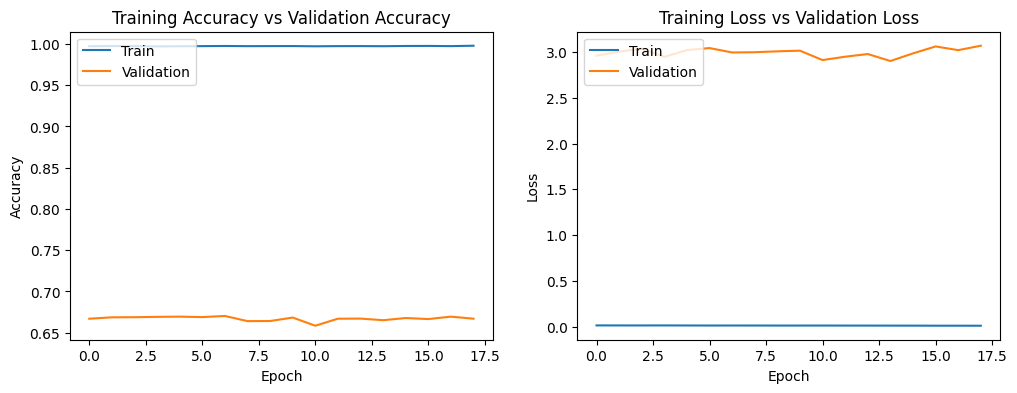

In [ ]:
import matplotlib.pyplot as plt
# Create plots for accuracy and loss.
train_acc = history_vgg19_class_weight.history['accuracy']
train_loss = history_vgg19_class_weight.history['loss']

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

ax[0].plot(history_vgg19_class_weight.history['accuracy'])
ax[0].plot(history_vgg19_class_weight.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history_vgg19_class_weight.history['loss'])
ax[1].plot(history_vgg19_class_weight.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
# Save the model
model_save_path = '/content/drive/My Drive/Colab Notebooks/ML Major project/vgg19_model_class_weight.h5'
vgg19_model.save(model_save_path)
print(f"VGG16 model saved to '{model_save_path}'.")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


VGG16 model saved to '/content/drive/My Drive/Colab Notebooks/ML Major project/vgg19_model_class_weight.h5'.


225/225 [==============================] - 4s 14ms/step


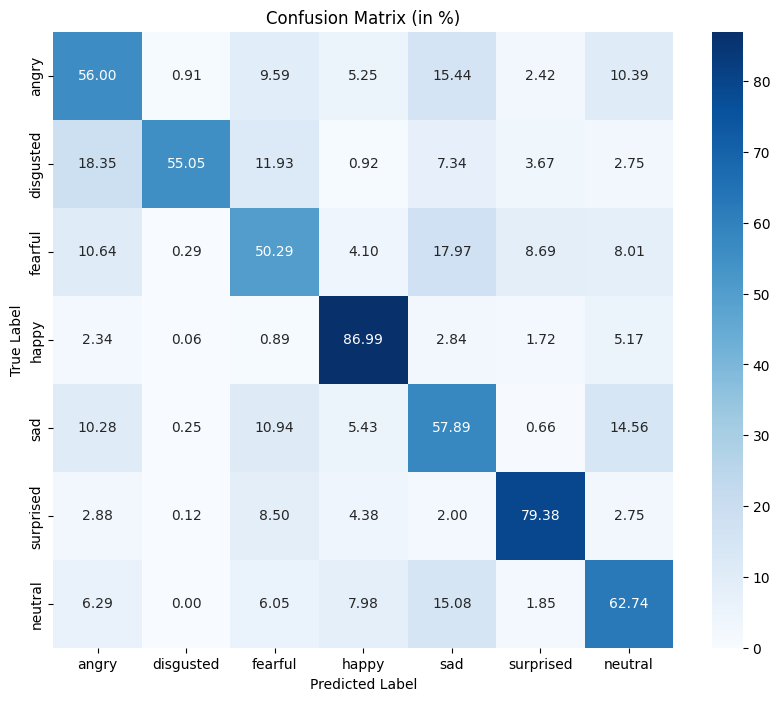

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict class labels for the validation set
y_pred = vgg19_model.predict(X_val_rgb)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val_onehot, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Normalize the confusion matrix
confusion_mtx_percentage = confusion_mtx.astype('float') / confusion_mtx.sum(axis=1)[:, np.newaxis]
confusion_mtx_percentage = np.round(confusion_mtx_percentage * 100, 2)  # round to two decimal places

# Plot the normalized confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx_percentage, annot=True, fmt=".2f", cmap="Blues", xticklabels=EMOTIONS, yticklabels=EMOTIONS)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (in %)')
plt.show()

The result shows that when I applied class weights to address class imbalance, the model's training and validation accuracy remained consistently high throughout the epochs. The loss decreased rapidly, indicating that the model was learning effectively. However, the validation loss started to increase after a certain number of epochs, which is often a sign of overfitting.

The reason for this behavior could be that the class weights helped the model focus more on the minority classes (such as "disgusted" and "fearful"). This led to improved accuracy on these classes during training, but as the model started to overfit the training data, its performance on the validation set began to degrade.

### Oversampling
Oversampling is a technique used in machine learning to address class imbalance in a dataset. Class imbalance occurs when one or more classes in the dataset have significantly fewer instances (samples) than others. In such cases, machine learning models can struggle to perform well on minority classes because they have insufficient data to learn from.

Oversampling involves increasing the number of instances in the minority class (the class with fewer samples) to balance the class distribution. This is typically done by randomly duplicating or generating new samples from the existing minority class samples. Oversampling aims to provide the model with a more balanced and representative dataset, allowing it to learn the minority class more effectively.

In [ ]:
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder

IMG_WIDTH, IMG_HEIGHT, CHANNELS = 48, 48, 1  # Set image dimensions and channels
# Convert one-hot encoding back to labels for y_train
y_train_labels = np.argmax(y_train_onehot, axis=1)

# Because SMOTE works on the original feature space, we need to reshape the data
X_train_flat = X_train_rgb.reshape(X_train_rgb.shape[0], -1)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_flat, y_train_labels)

# Convert the data back to its original shape
X_train_resampled = X_train_resampled.reshape(-1, IMG_WIDTH, IMG_HEIGHT, 3)

# Convert the resampled labels back to one-hot encoding
encoder = OneHotEncoder(sparse=False, categories='auto')
y_train_resampled_onehot = encoder.fit_transform(y_train_resampled.reshape(-1, 1))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
import numpy as np
from sklearn.utils import class_weight
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from google.colab import drive
drive.mount('/content/drive/')
# Load the saved model
model_path = '/content/drive/My Drive/Colab Notebooks/ML Major project/vgg19_model.h5'
vgg19_model = tf.keras.models.load_model(model_path)

early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0.00005, patience=11, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=7, min_lr=1e-7, verbose=1)
callbacks = [early_stopping, reduce_lr]

history_vgg19_oversampling = vgg19_model.fit(X_train_resampled, y_train_resampled_onehot,
                                             validation_data=(X_val_rgb, y_val_onehot),
                                             epochs=50,
                                             batch_size=256,
                                             callbacks=callbacks)


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Using provided training data

In [ ]:
import numpy as np
from os.path import join
from google.colab import drive
drive.mount('/content/drive/')

image_size = 48
EMOTIONS = ['angry', 'disgusted', 'fearful','happy', 'sad', 'surprised', 'neutral']
dataset_directory = '/content/drive/My Drive/Colab Notebooks/ML Major project/emotion-recognition-from-human-faces'

images_train = np.load(join(dataset_directory, 'Training_data_images.npy'))
labels_train = np.load(join(dataset_directory, 'Training_data_labels.npy'))

images_test_public = np.load(join(dataset_directory, 'PublicTest_data_images.npy'))

images_train = images_train.reshape([-1, image_size, image_size])
images_test_public = images_test_public.reshape([-1, image_size, image_size])

print(images_train.shape)
print(labels_train.shape)
print(images_test_public.shape)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
(9328, 48, 48)
(9328,)
(1136, 48, 48)


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and validation sets (80-20 split) with stratification
X_train, X_val, y_train, y_val = train_test_split(images_train, labels_train, test_size=0.2, stratify=labels_train, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)

Training set shape: (7462, 48, 48) (7462,)
Validation set shape: (1866, 48, 48) (1866,)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_WIDTH, IMG_HEIGHT, CHANNELS = 48, 48, 1  # Set image dimensions and channels
batch_size = 256
epochs = 100
# Revised preprocessing function
def preprocess_data(images):
    images = images[..., tf.newaxis]
    resized_images = tf.image.resize(images, [96, 96])
    rgb_images = tf.tile(resized_images, [1, 1, 1, 3])
    return rgb_images

X_train_rgb = preprocess_data(X_train)
X_val_rgb = preprocess_data(X_val)
# Convert labels to one-hot encoding
y_train_onehot = to_categorical(y_train)
y_val_onehot = to_categorical(y_val)
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = datagen.flow(X_train_rgb, y_train_onehot, batch_size=batch_size)

vgg = tf.keras.applications.VGG19(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

x = vgg.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
output = Dense(7, activation='softmax', name='output_layer', kernel_regularizer=l2(0.01))(x)

vgg19_modeli = tf.keras.Model(vgg.input, output)

early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0.00005, patience=11, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=7, min_lr=1e-7, verbose=1)
callbacks = [early_stopping, reduce_lr]


vgg19_modeli.compile(loss='categorical_crossentropy',
                     optimizer=optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999),
                     metrics=['accuracy'])

# Fit the vgg19_modeli using datagen.flow()
steps_per_epoch = len(X_train_rgb) // batch_size

history_vgg19i = vgg19_modeli.fit(train_generator,
                                  validation_data=(X_val_rgb, y_val_onehot),
                                  epochs=epochs,
                                  steps_per_epoch=steps_per_epoch,
                                  callbacks=callbacks)


Epoch 1/100
29/29 [==============================] - 53s 1s/step - loss: 2.0290 - accuracy: 0.2410 - val_loss: 1.9318 - val_accuracy: 0.2053 - lr: 1.0000e-04
Epoch 2/100
29/29 [==============================] - 30s 1s/step - loss: 1.9210 - accuracy: 0.2814 - val_loss: 1.8132 - val_accuracy: 0.3087 - lr: 1.0000e-04
Epoch 3/100
29/29 [==============================] - 31s 1s/step - loss: 1.8757 - accuracy: 0.2935 - val_loss: 1.7274 - val_accuracy: 0.3403 - lr: 1.0000e-04
Epoch 4/100
29/29 [==============================] - 30s 1s/step - loss: 1.7676 - accuracy: 0.3615 - val_loss: 1.7286 - val_accuracy: 0.4480 - lr: 1.0000e-04
Epoch 5/100
29/29 [==============================] - 30s 1s/step - loss: 1.6604 - accuracy: 0.4124 - val_loss: 1.5317 - val_accuracy: 0.4791 - lr: 1.0000e-04
Epoch 6/100
29/29 [==============================] - 29s 991ms/step - loss: 1.5493 - accuracy: 0.4543 - val_loss: 1.3725 - val_accuracy: 0.5466 - lr: 1.0000e-04
Epoch 7/100
29/29 [==============================

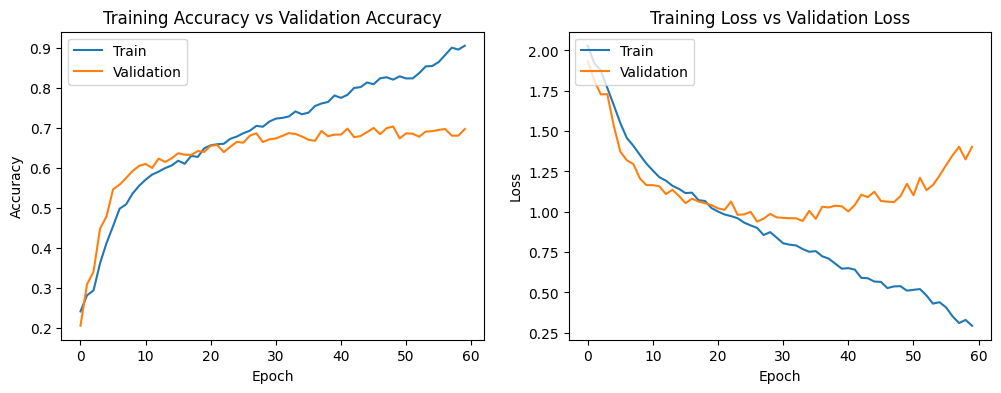

In [ ]:
import matplotlib.pyplot as plt
# Create plots for accuracy and loss.
train_acc = history_vgg19i.history['accuracy']
train_loss = history_vgg19i.history['loss']

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

ax[0].plot(history_vgg19i.history['accuracy'])
ax[0].plot(history_vgg19i.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history_vgg19i.history['loss'])
ax[1].plot(history_vgg19i.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
# Save the model
model_save_path = '/content/drive/My Drive/Colab Notebooks/ML Major project/vgg19_modeli.h5'
vgg19_modeli.save(model_save_path)
print(f"VGG16 model saved to '{model_save_path}'.")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


VGG16 model saved to '/content/drive/My Drive/Colab Notebooks/ML Major project/vgg19_modeli.h5'.


59/59 [==============================] - 2s 32ms/step


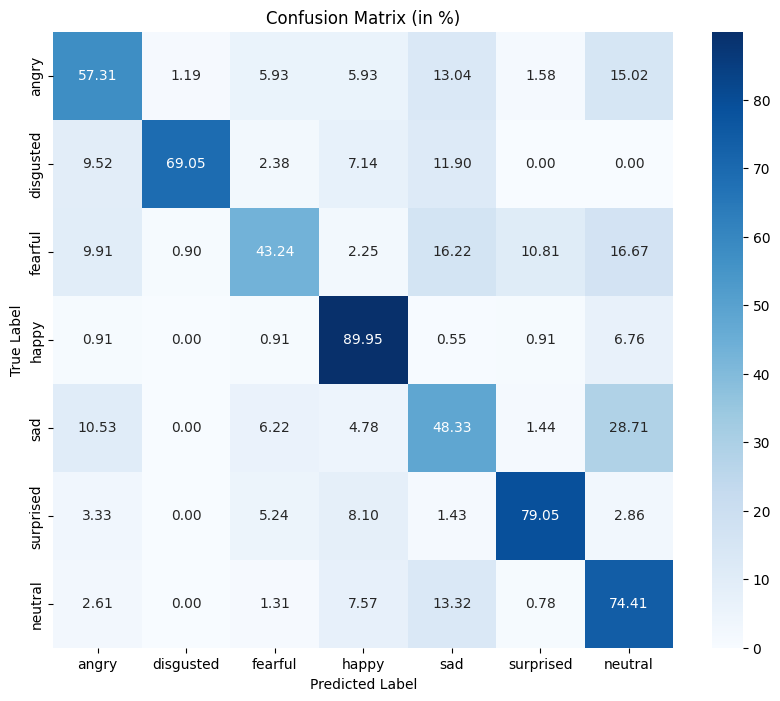

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict class labels for the validation set
y_pred = vgg19_modeli.predict(X_val_rgb)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val_onehot, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Normalize the confusion matrix
confusion_mtx_percentage = confusion_mtx.astype('float') / confusion_mtx.sum(axis=1)[:, np.newaxis]
confusion_mtx_percentage = np.round(confusion_mtx_percentage * 100, 2)  # round to two decimal places

# Plot the normalized confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx_percentage, annot=True, fmt=".2f", cmap="Blues", xticklabels=EMOTIONS, yticklabels=EMOTIONS)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (in %)')
plt.show()

### Making prediction on public data set

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

image_size = 48
EMOTIONS = ['angry', 'disgusted', 'fearful','happy', 'sad', 'surprised', 'neutral']
dataset_directory = '/content/drive/My Drive/Colab Notebooks/ML Major project/emotion-recognition-from-human-faces'
images_test_public = np.load(join(dataset_directory, 'PublicTest_data_images.npy'))

# Reshape the dataset to include the channel dimension (grayscale)
images_test_public= images_test_public.reshape(-1, image_size, image_size, 1)

# Convert grayscale images to RGB
X_test_public_rgb = np.repeat(images_test_public, 3, axis=-1)

X_test_public_rgb.shape


In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np

# Load the saved model
model_path = '/content/drive/My Drive/Colab Notebooks/ML Major project/VGG19.h5'
model = tf.keras.models.load_model(model_path)

# Assuming images_test_public is preprocessed and ready for predictions
predictions_array = model.predict(X_test_public_rgb)

# Convert predictions from one-hot encoded to class indices
predictions = [np.argmax(probas) for probas in predictions_array]

# Create a DataFrame to store the image IDs and predictions
result_df = pd.DataFrame({'ID': range(len(images_test_public)), 'Predictions': predictions})

# Define the path where you want to save the CSV file
csv_file_path = '/content/drive/My Drive/Colab Notebooks/ML Major project/47525088-deep-VGG19.csv'

# Write the DataFrame to a CSV file
result_df.to_csv(csv_file_path, index=False)

print(f'Results saved to {csv_file_path}')


# Notes on the Deep Learning Model

The final deep learning model is a customized version of the VGG19 model, trained on the fer2013 dataset. It included data preprocessing techniques such as data augmentation and L2 regularization to enhance model performance. Additionally, a learning rate reduction strategy is employed when the model reaches a plateau during training, aiding in convergence and fine-tuning.

# Discussion of Model Performance and Implementation

In the comparison between my final conventional ML and deep learning models, the deep learning model outperformed the conventional one by 5% on the public test set. The deep learning model achieved an accuracy of 75%, ranking it at #2 among 32 submissions in the public test set. The top-performing system had an accuracy of 78%, while a majority class baseline reached 60% accuracy.

On the private test set, the deep learning model also excelled with an accuracy of 77%, ranking the #2 spot among 26 submissions. The leading system achieved an accuracy of 80%, and the majority class baseline remained at 60% accuracy.

The similar or lower accuracy scores observed in both conventional and Convolutional Neural Network (CNN) models on the public dataset compared to the validation dataset can be attributed to various factors. One key factor is the potential difference in data distribution between the two datasets. If the models were primarily trained or validated on data that doesn't precisely represent the public dataset, it can lead to a drop in accuracy when tested on this new data. Overfitting is another concern, as models may perform well on training or validation data but struggle to generalize to unseen data, resulting in reduced performance on the public dataset.

In contrast, pretrained models like VGG19 exhibit a different trend, achieving higher accuracy on the public dataset than the validation dataset. This can be attributed to several factors. Firstly, pretrained models have learned a wide range of features from large and diverse datasets during their original training, making them adept at capturing generic features that are useful for various computer vision tasks. When fine-tuned on the validation dataset, these models adapt these generic features to the specific task, potentially enhancing performance. Additionally, pretrained models often come with built-in regularization techniques, improving generalization to new data. Lastly, the public dataset may have a data distribution closer to that of the source dataset used for pretraining, contributing to the superior performance of pretrained models on this dataset.

Both the CNN model and the pretrained model (VGG19) achieving higher accuracy scores on the private dataset compared to the public dataset. The higher accuracy scores on the private dataset are likely due to the alignment of the private dataset's data distribution with the training and source data used for the models. Additionally, the regularization effects and generalization capabilities of pretrained models contribute to their improved performance on datasets that share characteristics with their original training data.